In [22]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Aer.backends()
backend = Aer.get_backend('statevector_simulator')

In [3]:
# from qiskit.providers.aer import StatevectorSimulator
# backend = StatevectorSimulator(device="gpu")

In [4]:
# FR = np.array([[1, 0],
#               [0, 1]])
# CR=np.array([1,1])

# # Normalize weights
# CR = CR/np.max(CR)

In [5]:
FR = np.array([[1, 1],
              [1, 1]])
CR=np.array([1,10])

# Normalize weights
CR = CR/np.max(CR)

In [6]:
# FR = np.array([[1, 0,1, 0],
#               [0, 1,1, 0],
#               [0, 0,0, 1]])
# # CR=np.array([1,1,2.125,1])
# CR=np.random.rand(4)

# # Normalize weights
# CR = CR/np.max(CR)

In [7]:
# from data.tailassignment_loader import *
# FR,CR = npy_loader(f'../data//tailassignment_samples/npy_samples/FRCR_6_24_3_1.npy')

# # Normalize weights
# CR = CR/np.max(CR)

In [8]:
# F, R  = np.shape(FR)

In [9]:
# c=cost_vector(CR,FR,1,plotsolutions=True)

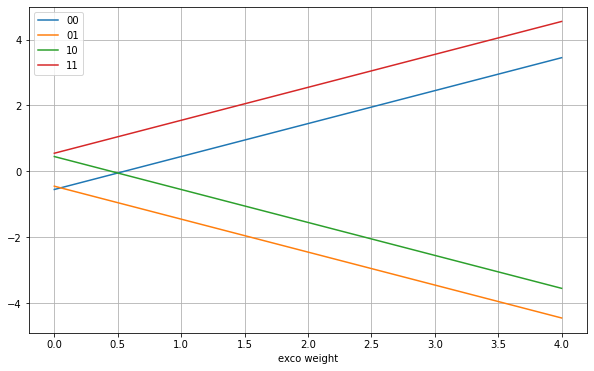

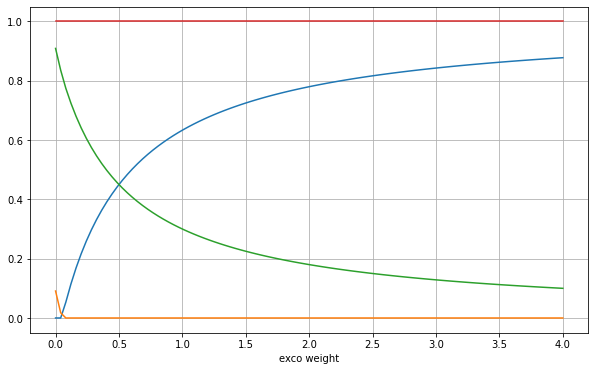

In [10]:
x, e, es, ue, lab = getSpectrum(CR, FR)

pl.figure(figsize=(10,6))
for key in ue:
    pl.plot(x,ue[key],label=lab[key])
pl.xlabel("exco weight")
pl.legend()
pl.grid()

pl.figure(figsize=(10,6))
for i in range(e.shape[0]):
    pl.plot(x,es[i,:])
pl.xlabel("exco weight")
pl.grid()

mu= 0.1
Optimization terminated successfully.
         Current function value: 0.180217
         Iterations: 11
         Function evaluations: 23
[1.49619213 2.32324746] [1.49619213 2.32324746]
mu= 0.2
Optimization terminated successfully.
         Current function value: 0.332604
         Iterations: 9
         Function evaluations: 19
[1.2908084  2.21516126] [1.2908084  2.21516126]
mu= 1
Optimization terminated successfully.
         Current function value: 0.523343
         Iterations: 10
         Function evaluations: 21
[5.62375189 1.11895102] [5.62375189 1.11895102]
mu= 10
Optimization terminated successfully.
         Current function value: 0.602647
         Iterations: 10
         Function evaluations: 22
[5.57892859 1.12833491] [5.57892859 1.12833491]


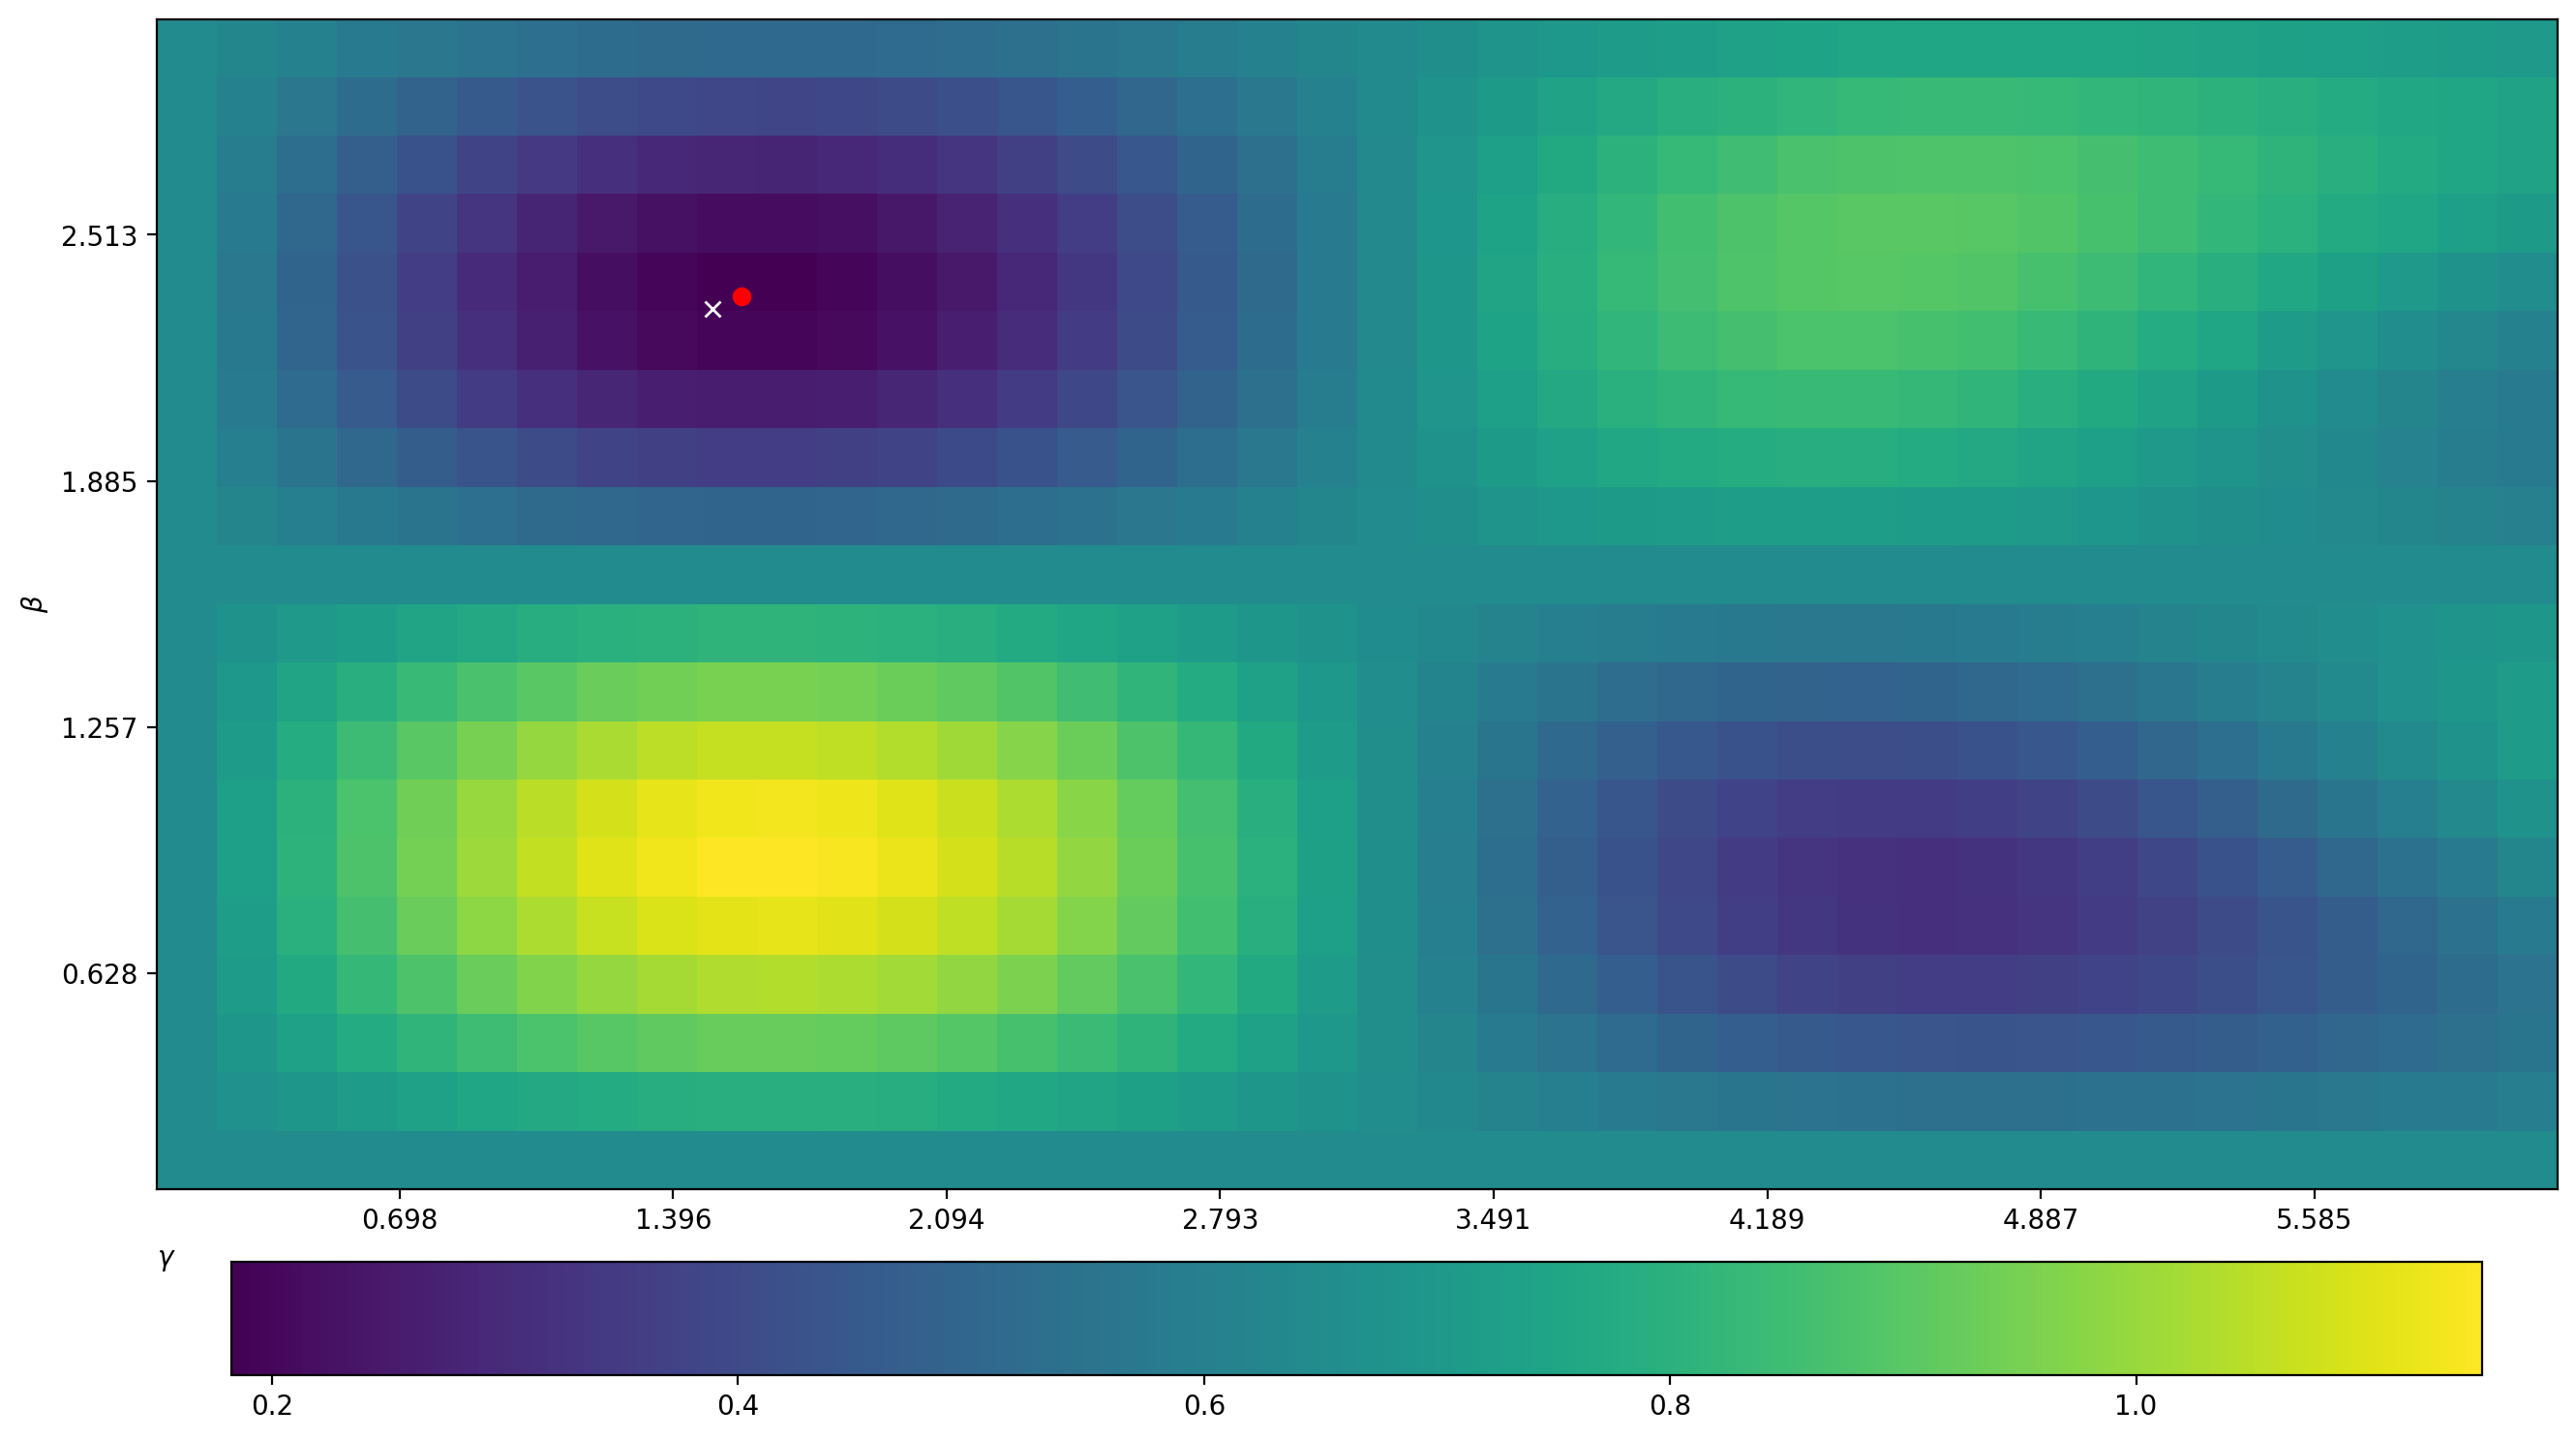

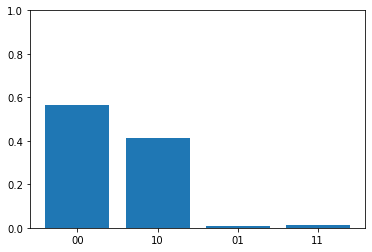

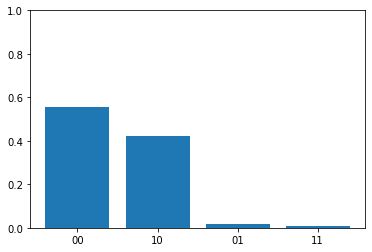

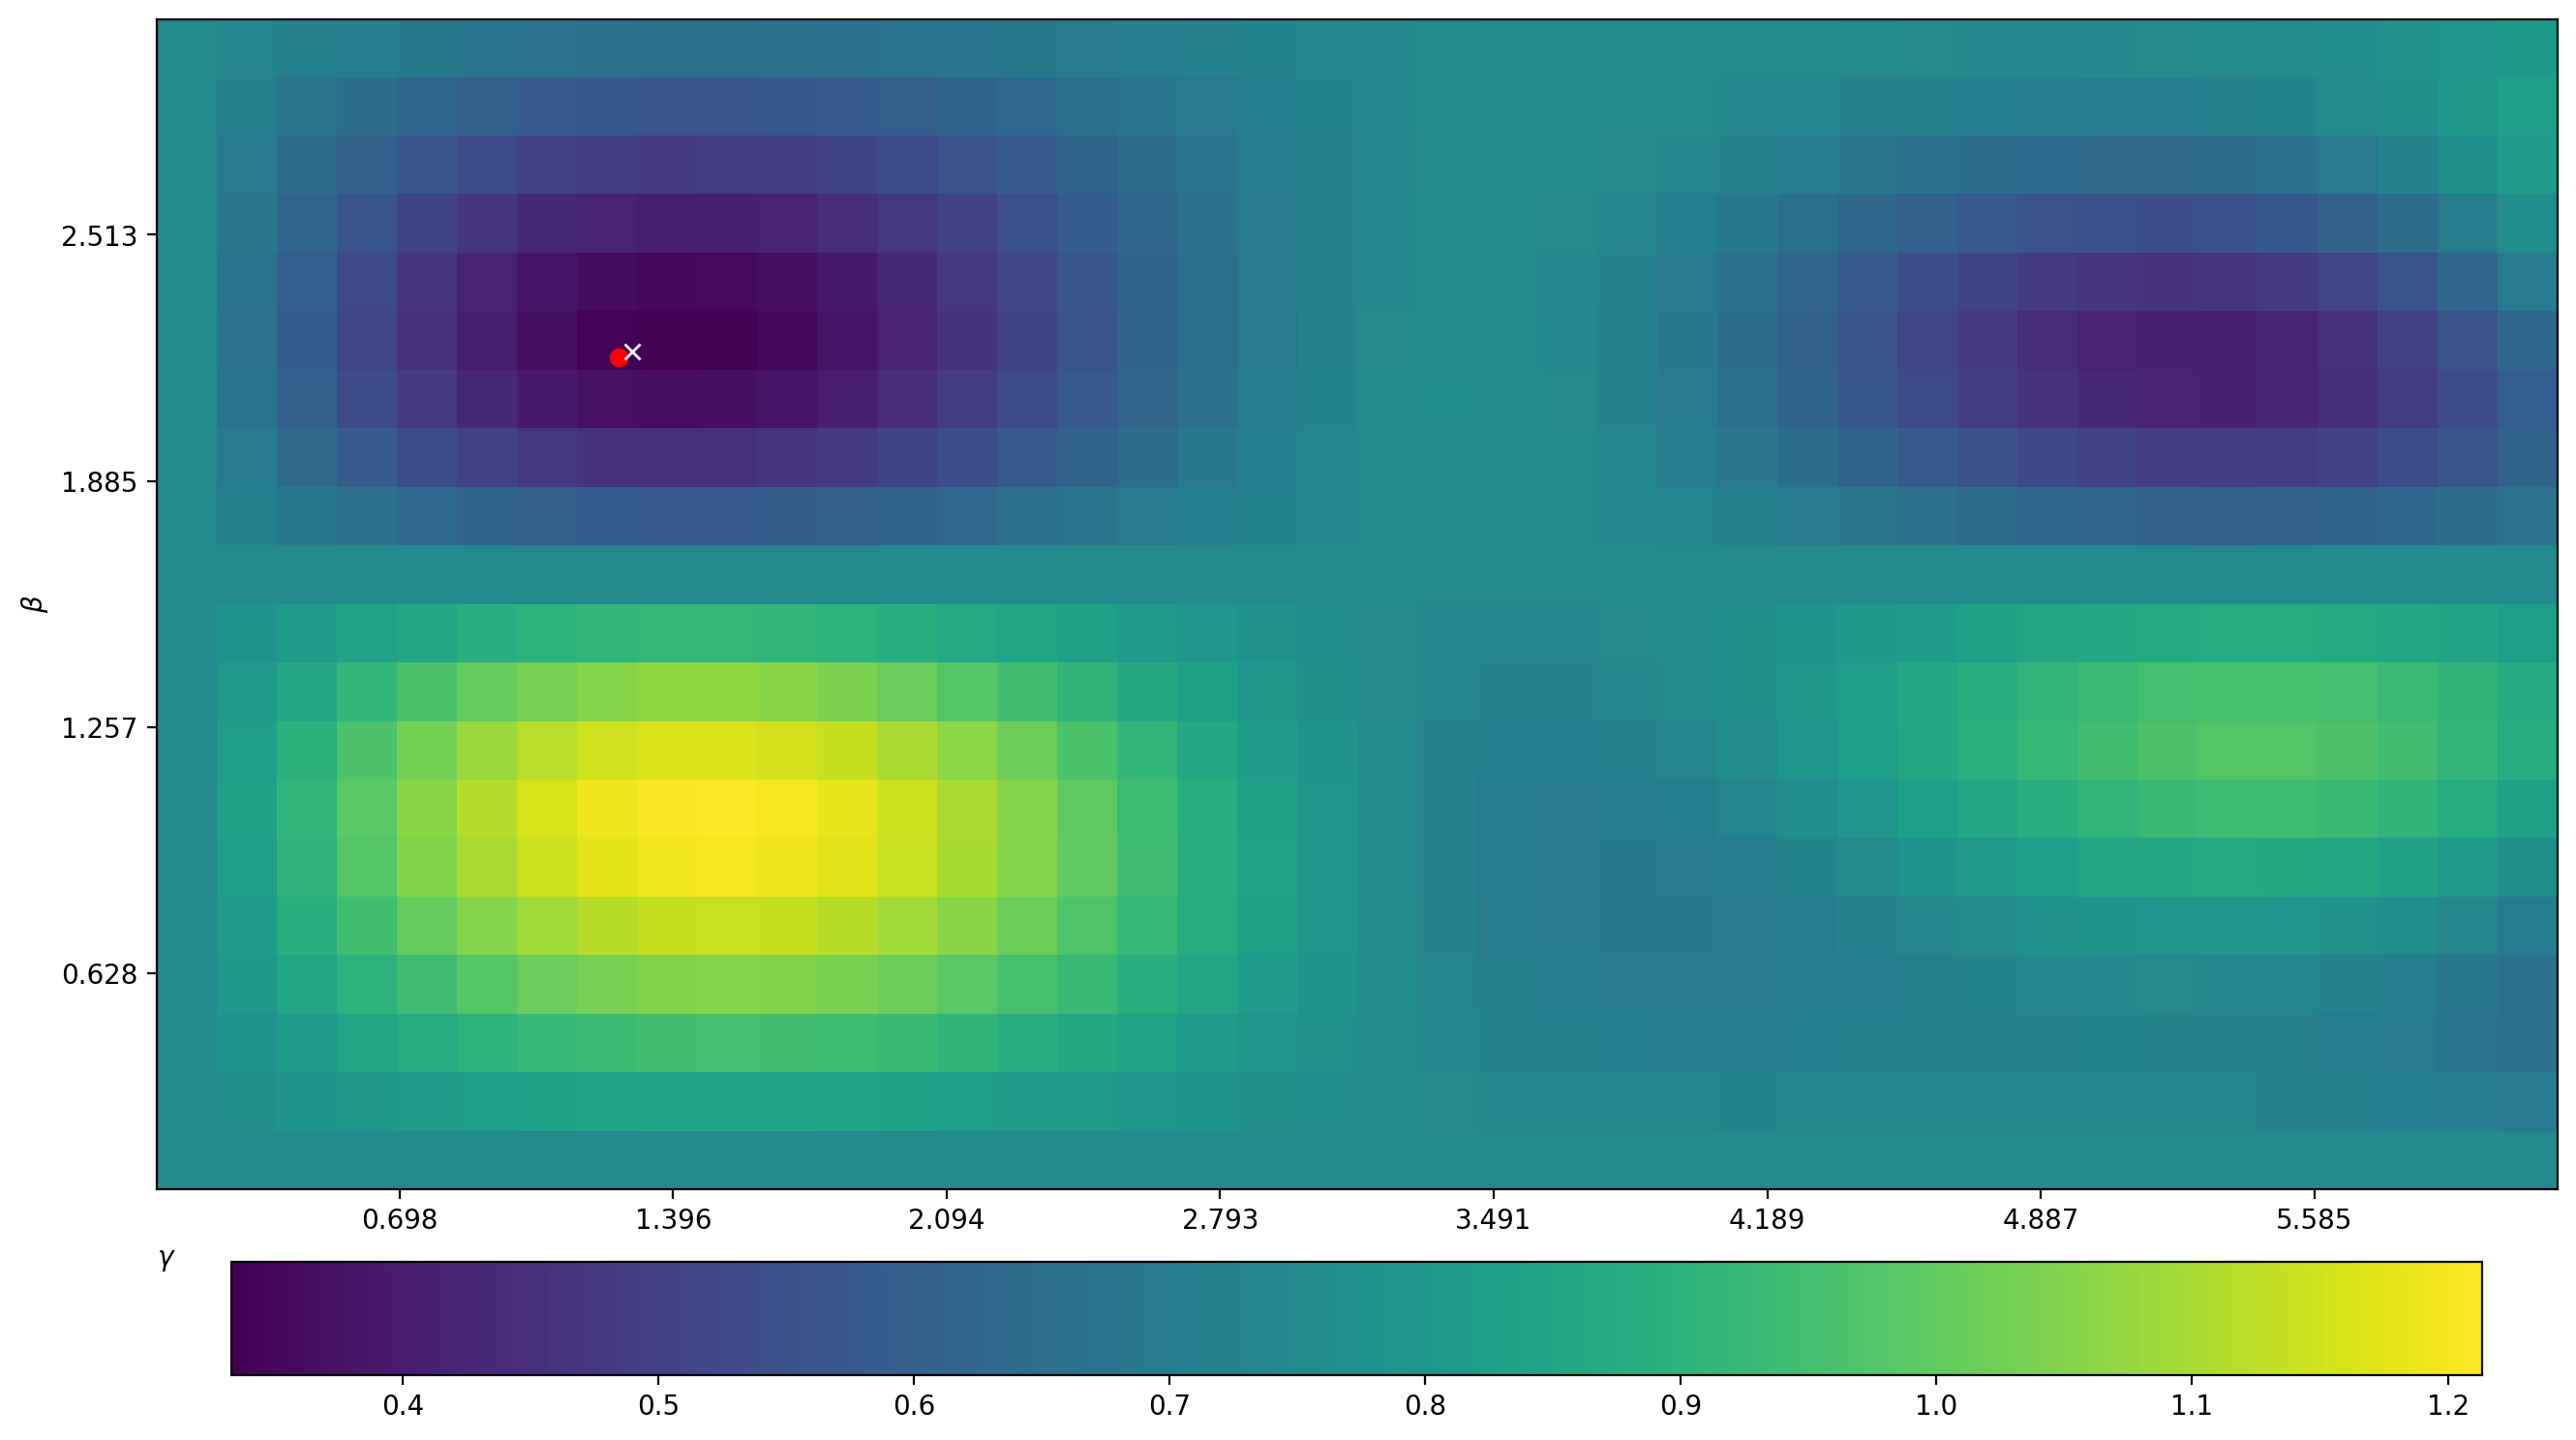

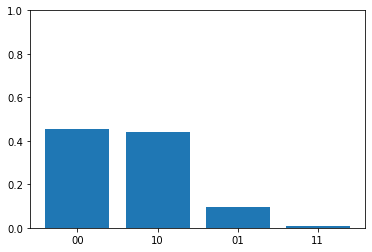

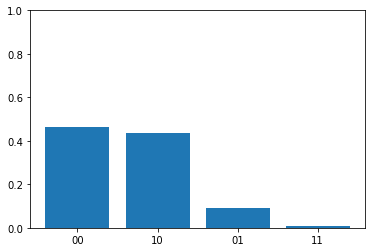

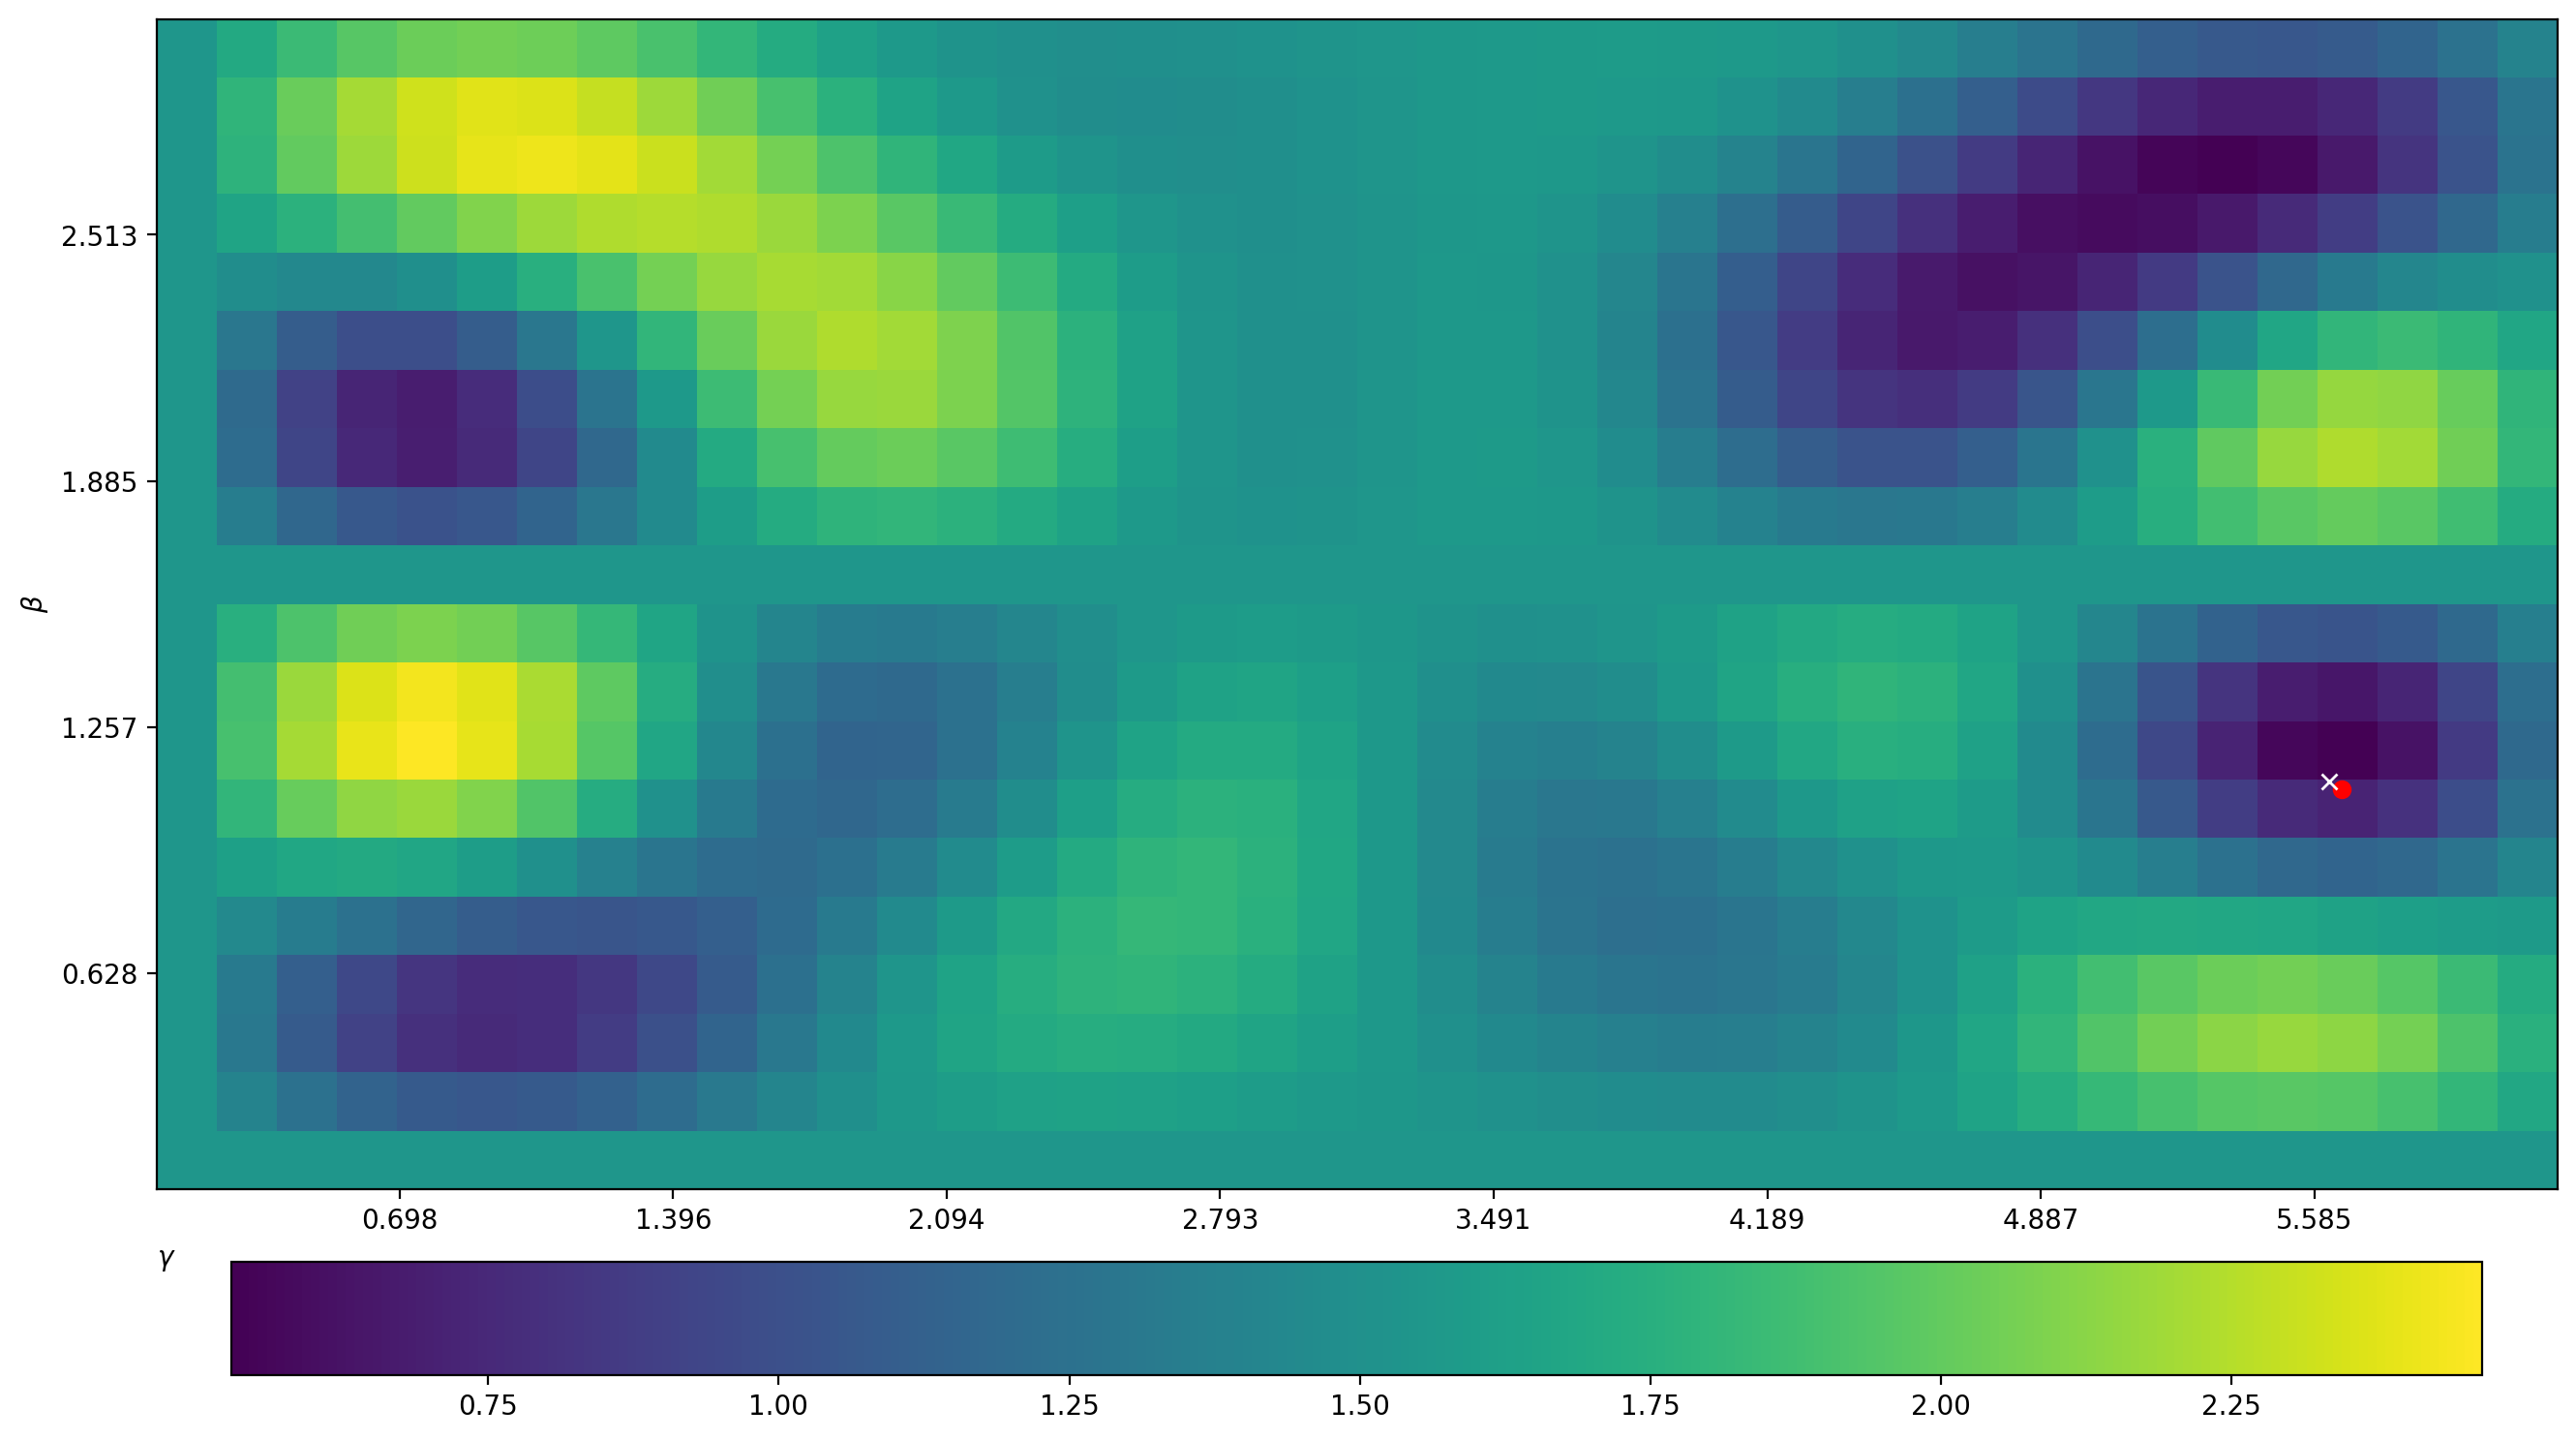

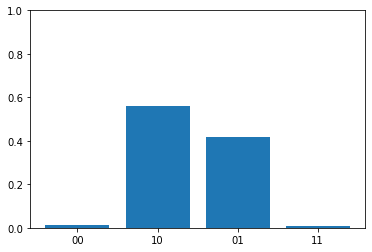

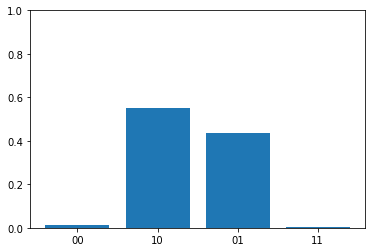

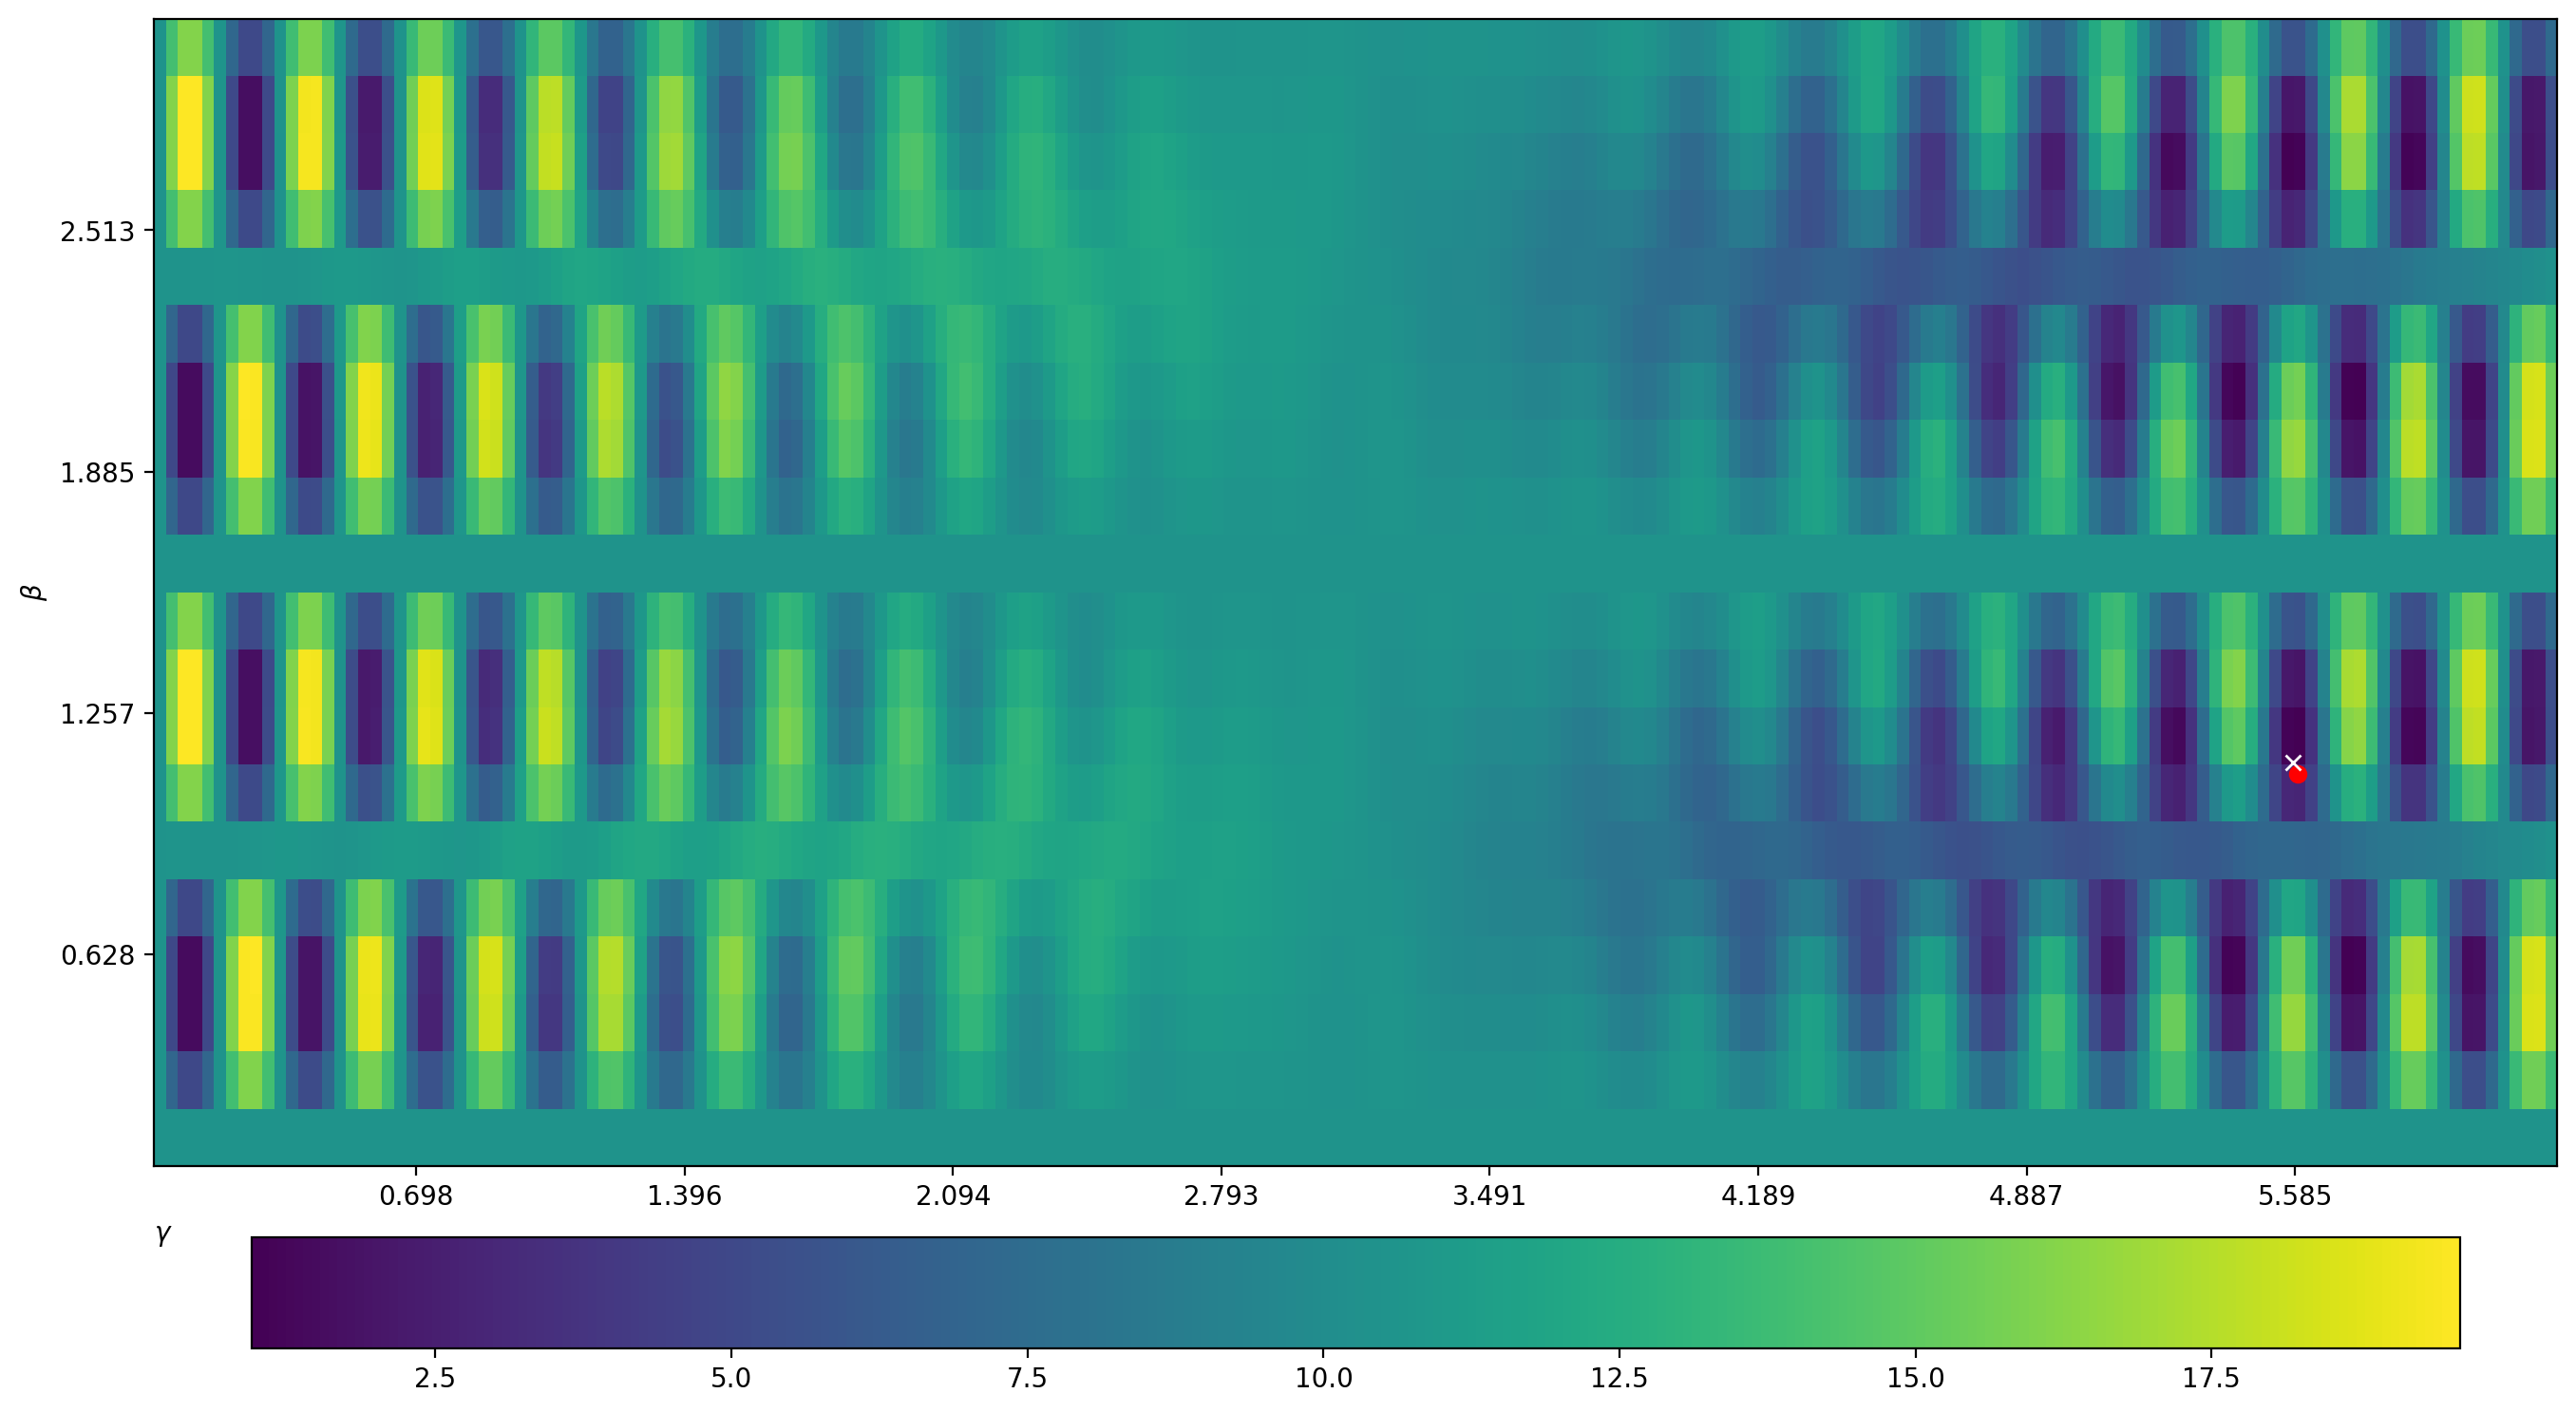

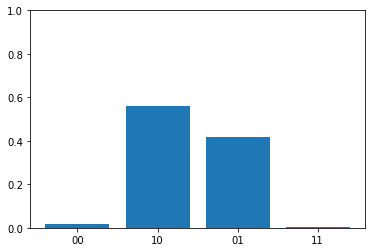

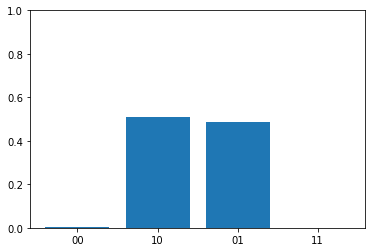

In [31]:
qaoa=QAOASwe(CR, FR)

for mu in [0.1, 0.2,1,10]: 
    print("mu=",mu)
    if mu>1:
        m=40*5
    else:
        m=40
    E, x0, job, ji = qaoa.getElandscape(backend,mu,ng=m)
    out, job_b, xb = qaoa.getlocalmin(x0, backend, mu)

    # plot landscape
    _=getfig(E,ng=m)
    pl.plot(x0[0],x0[1],'ro')
    pl.plot(xb[0],xb[1],'wx')
    
    # plot histogram
    md=job.result().get_counts()[int(ji)]
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])
    
    # plot histogram
    md=job_b.result().get_counts()
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])

mu= 0.1 useExco= True
Optimization terminated successfully.
         Current function value: 0.550011
         Iterations: 12
         Function evaluations: 21
[0.77800629 0.3925917 ] [0.77800629 0.3925917 ]
mu= 0.2 useExco= True
Optimization terminated successfully.
         Current function value: 0.550022
         Iterations: 12
         Function evaluations: 21
[0.77800629 0.3925917 ] [0.77800629 0.3925917 ]
mu= 1 useExco= True
Optimization terminated successfully.
         Current function value: 0.550109
         Iterations: 12
         Function evaluations: 21
[0.77800629 0.3925917 ] [0.77800629 0.3925917 ]
mu= 10 useExco= True
Optimization terminated successfully.
         Current function value: 0.550859
         Iterations: 10
         Function evaluations: 21
[0.78187001 1.96625657] [0.78187001 1.96625657]
mu= 0.1 useExco= False
Optimization terminated successfully.
         Current function value: 0.127283
         Iterations: 11
         Function evaluations: 22
[4.7187274

/tmp/ipykernel_650769/3637396732.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pl.figure()


Optimization terminated successfully.
         Current function value: 5.457587
         Iterations: 10
         Function evaluations: 21
[4.87688397 0.78487206] [4.87688397 0.78487206]


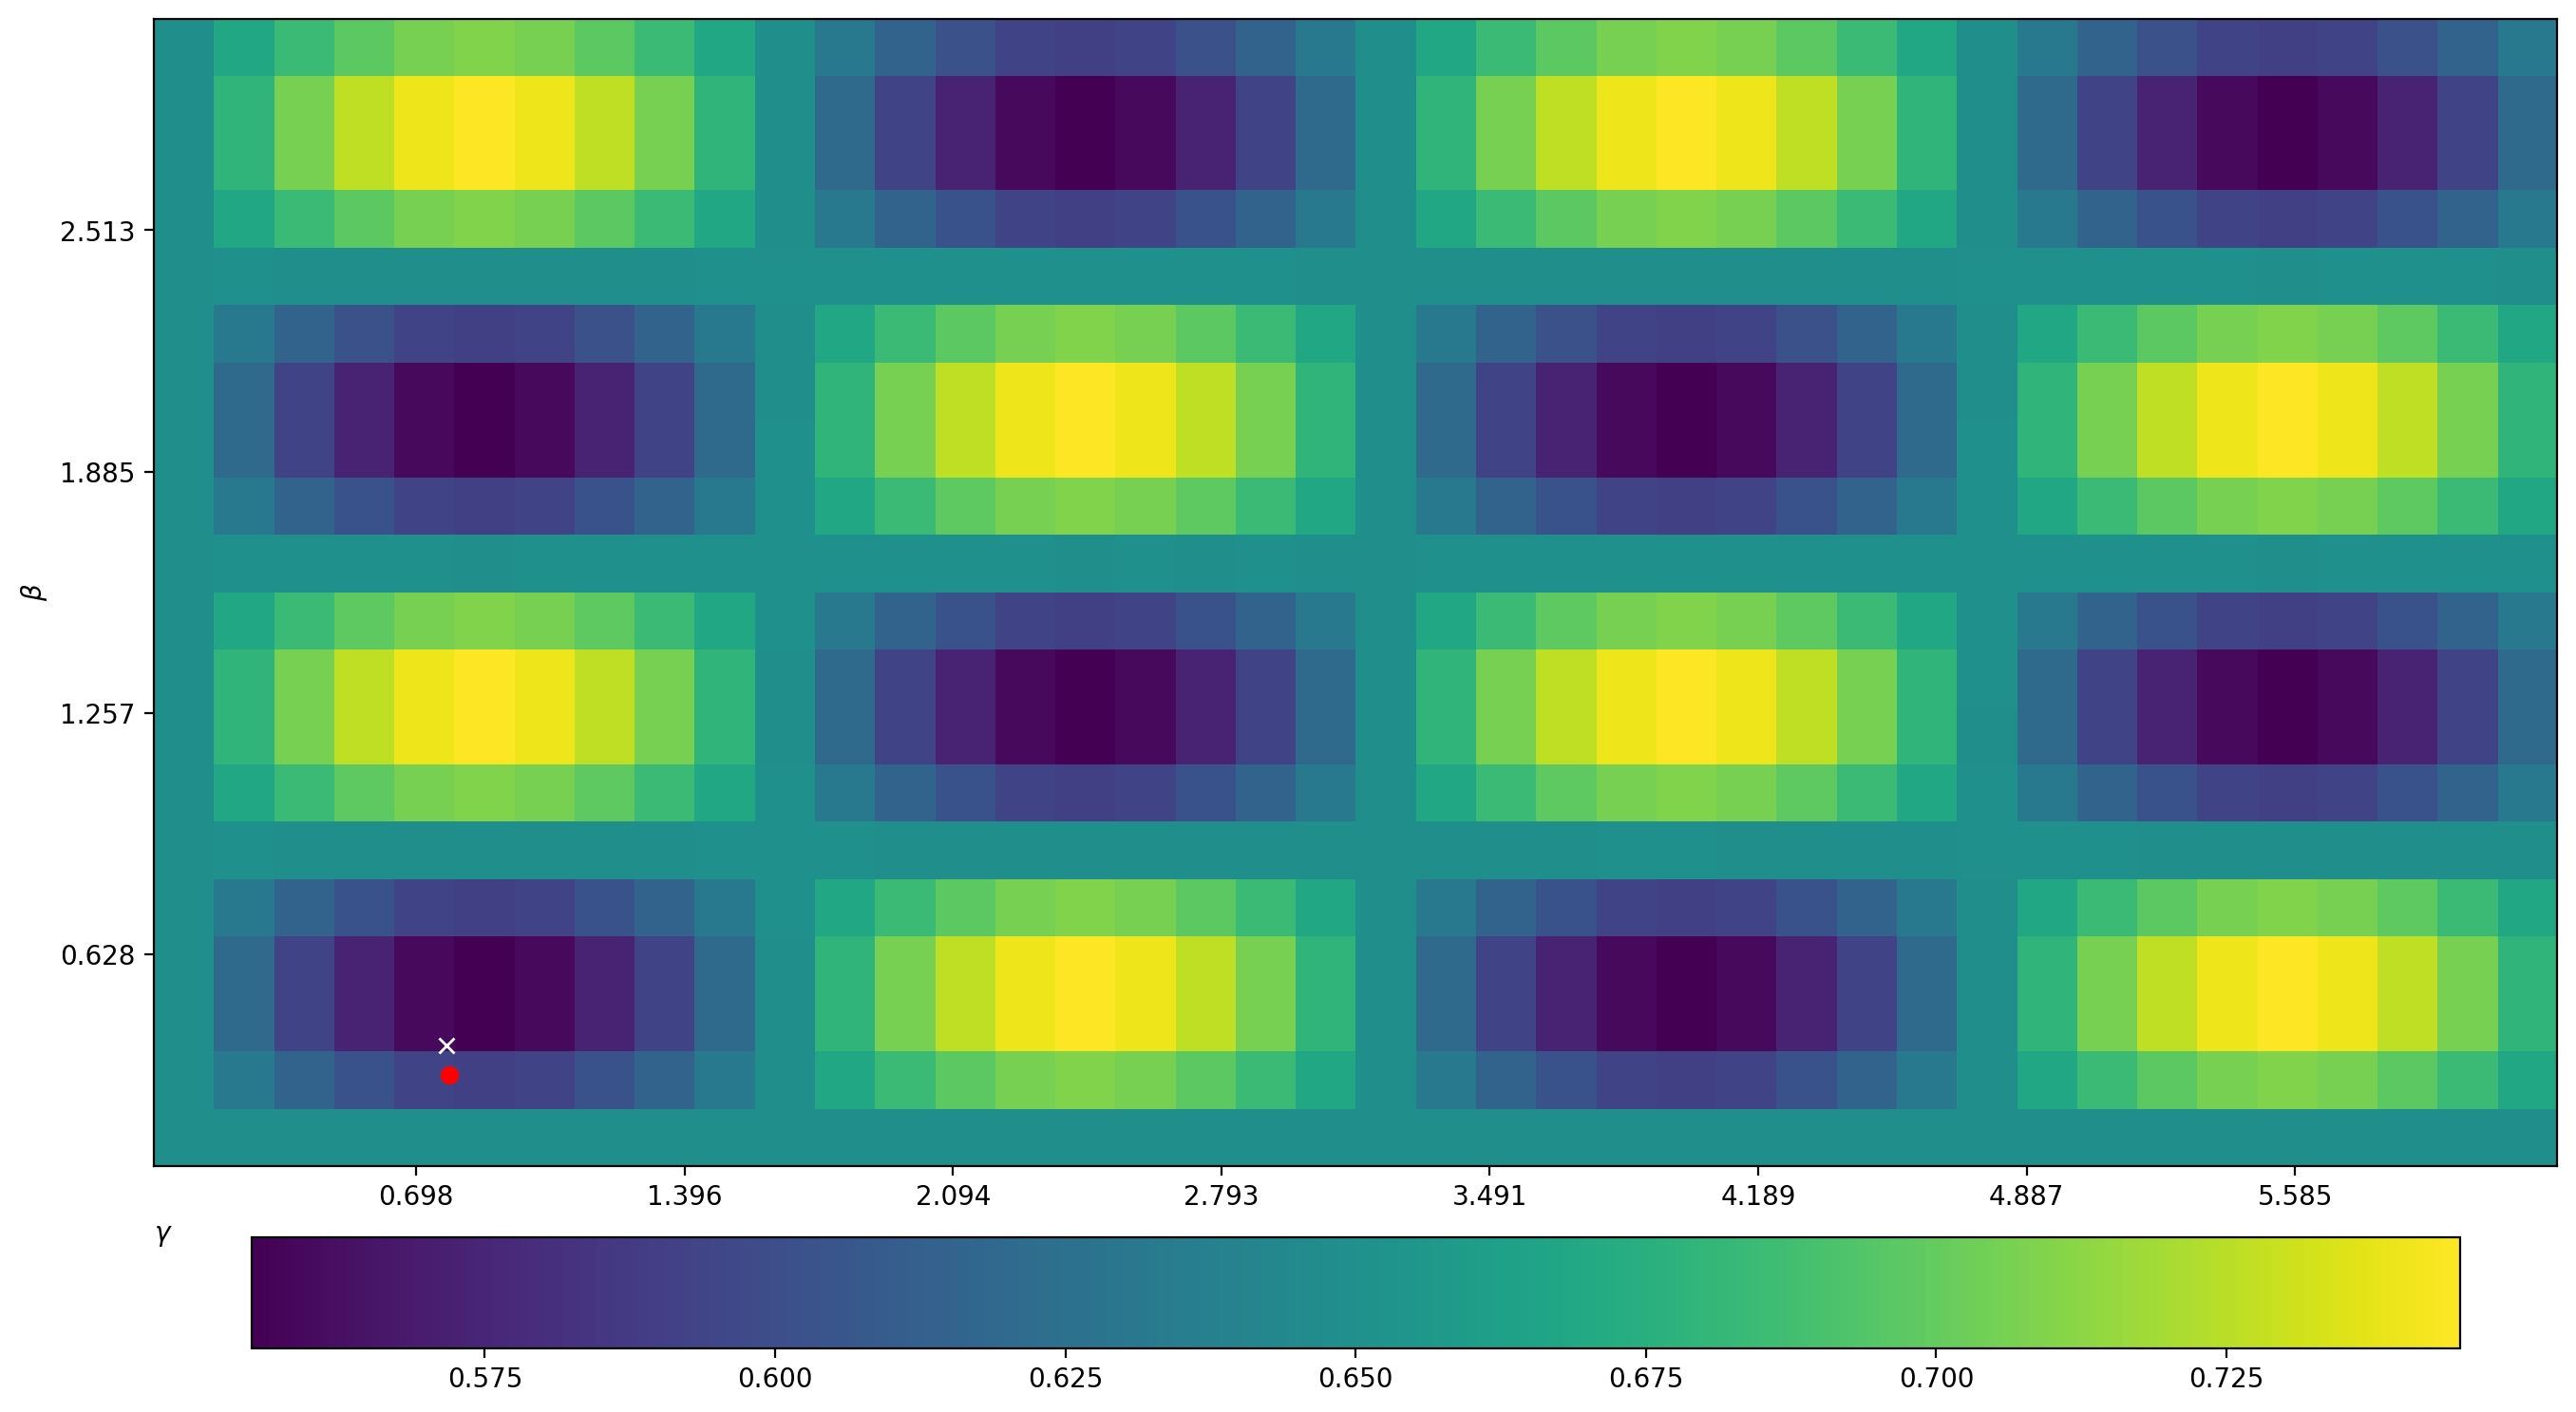

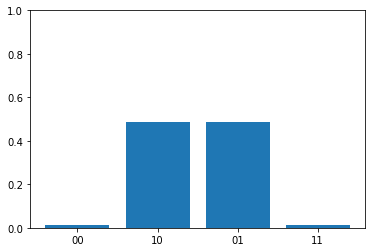

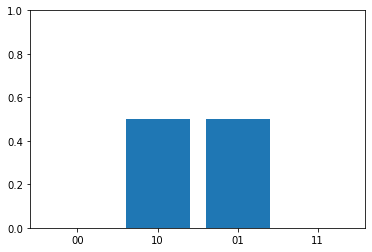

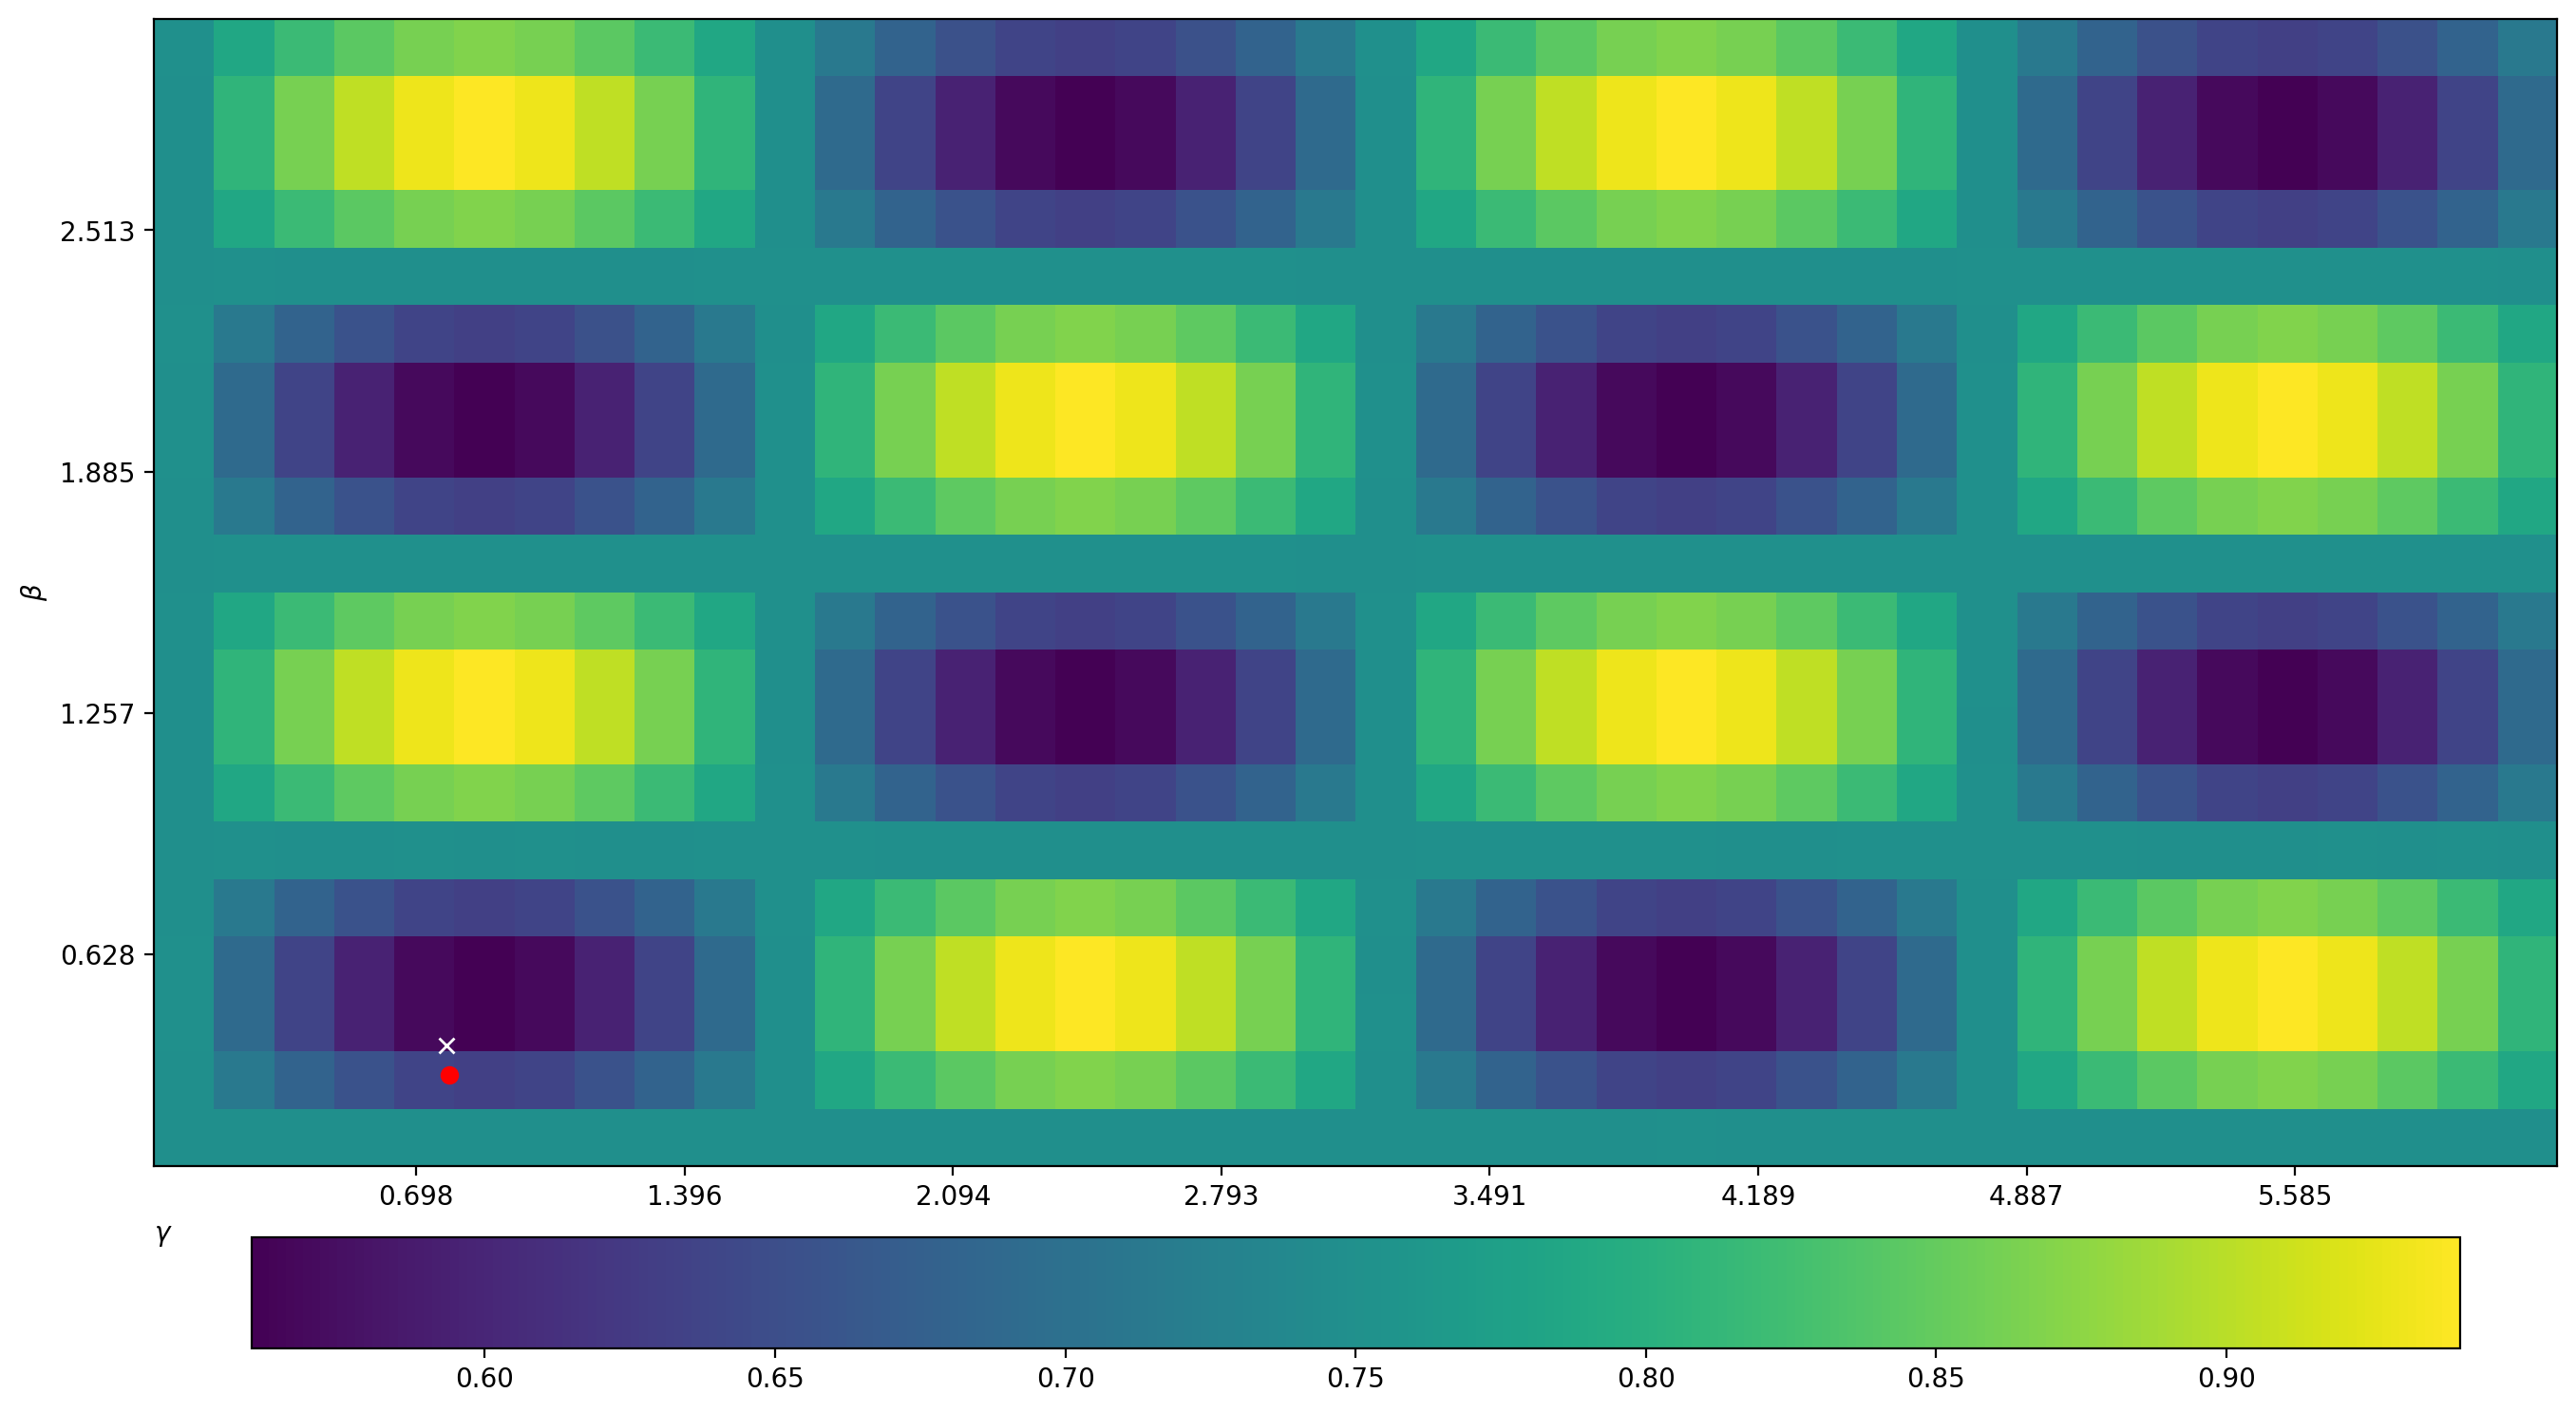

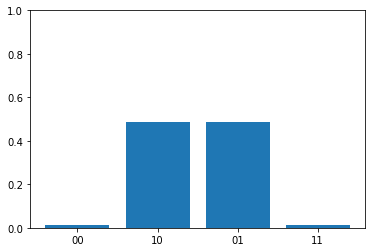

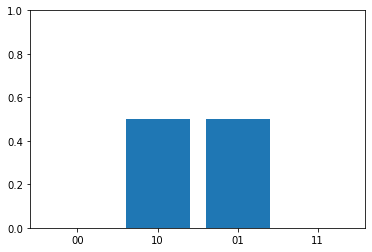

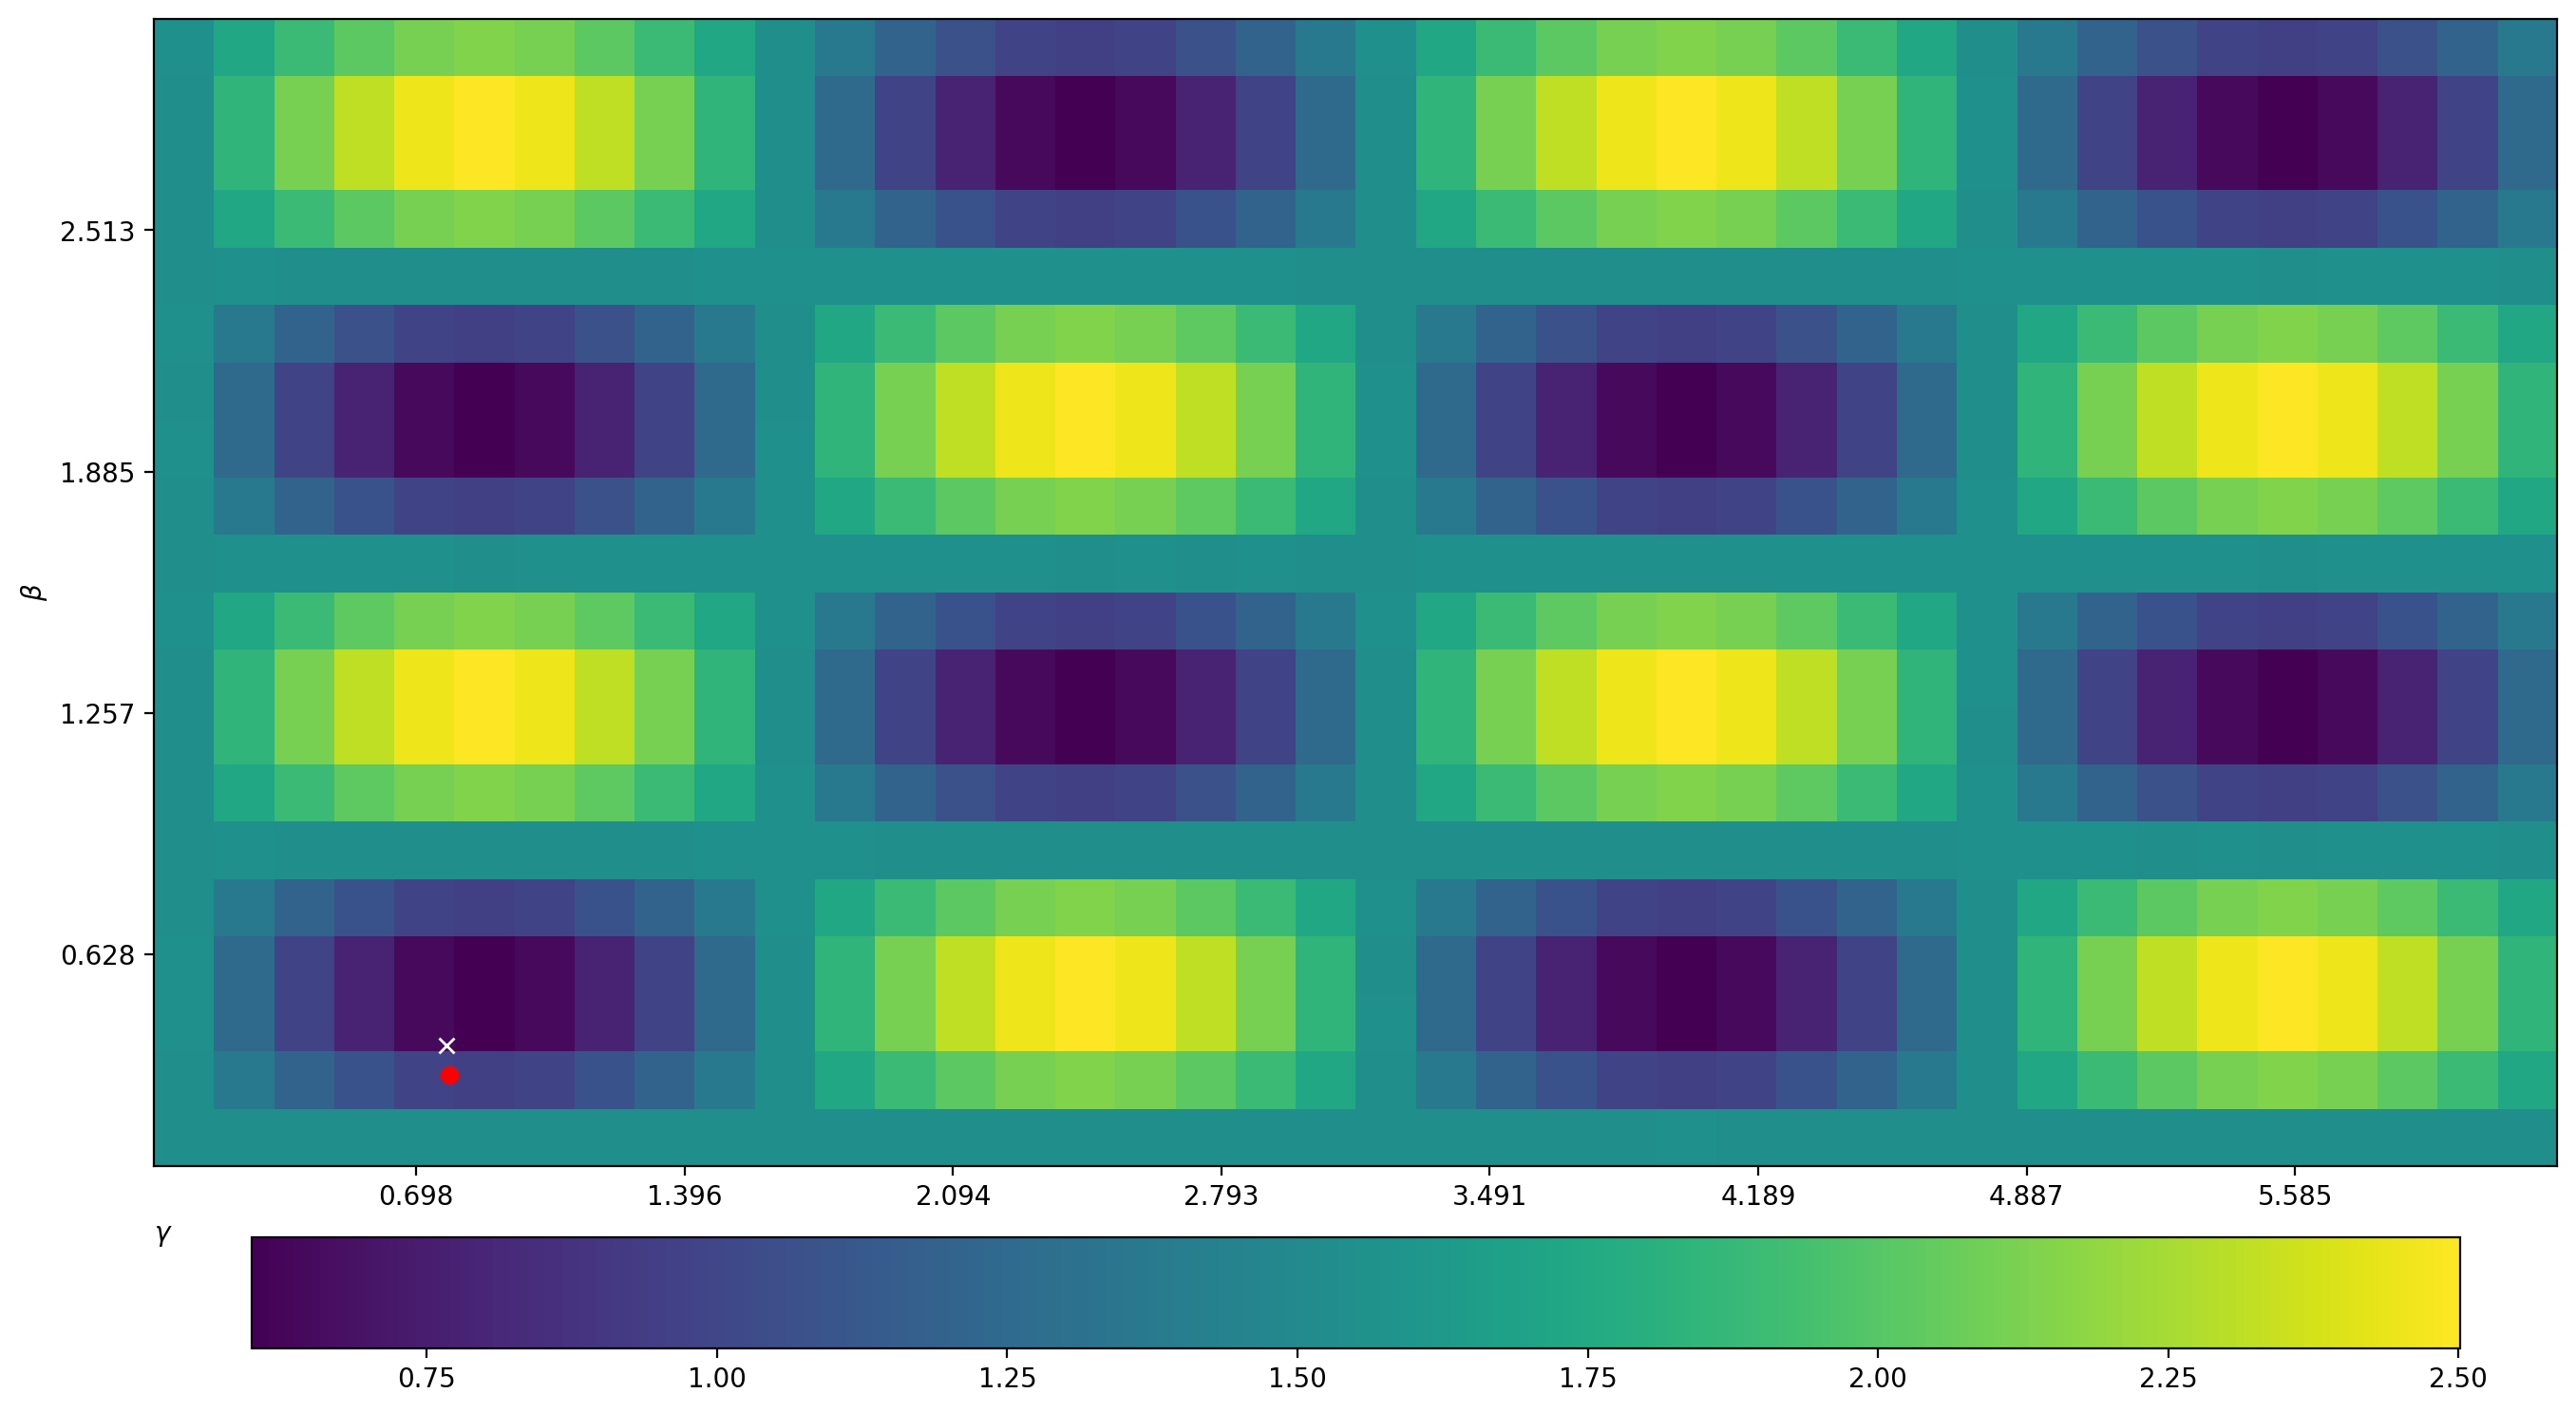

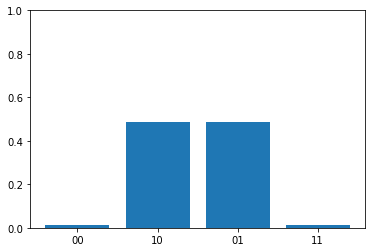

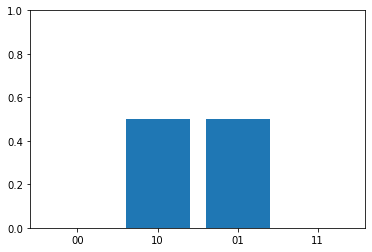

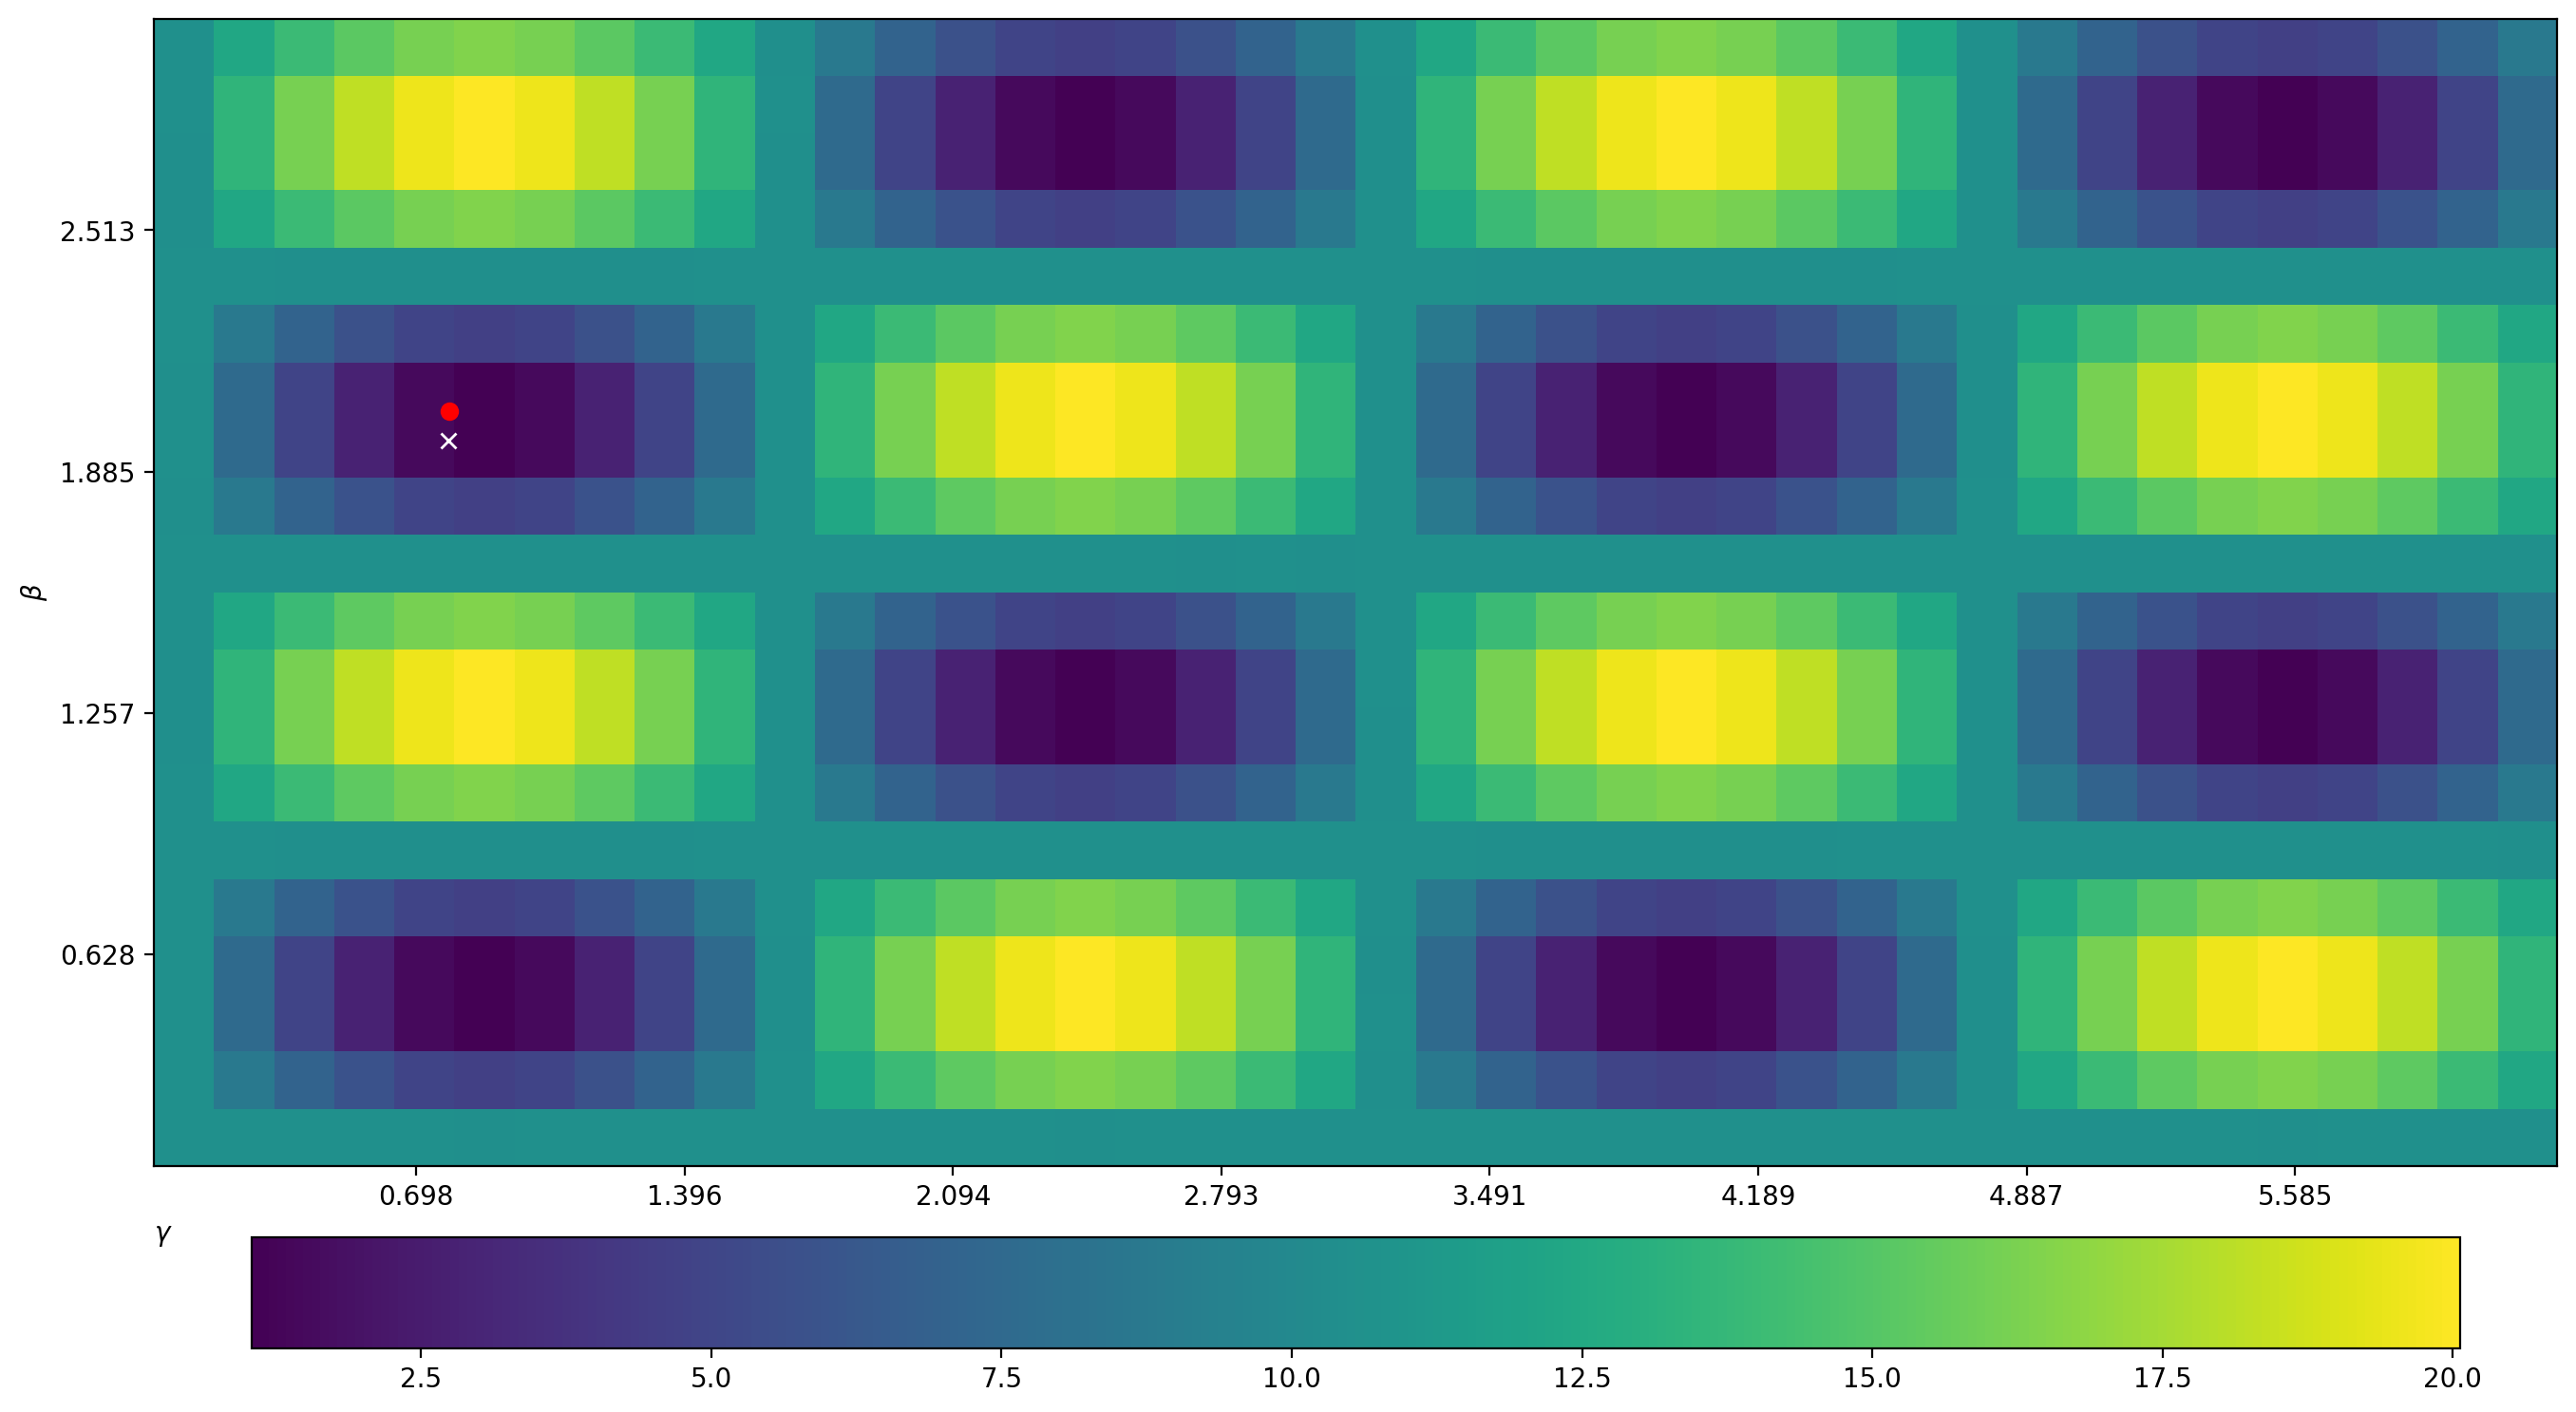

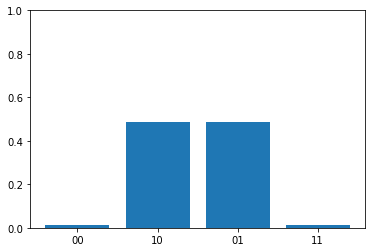

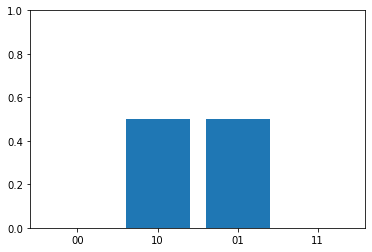

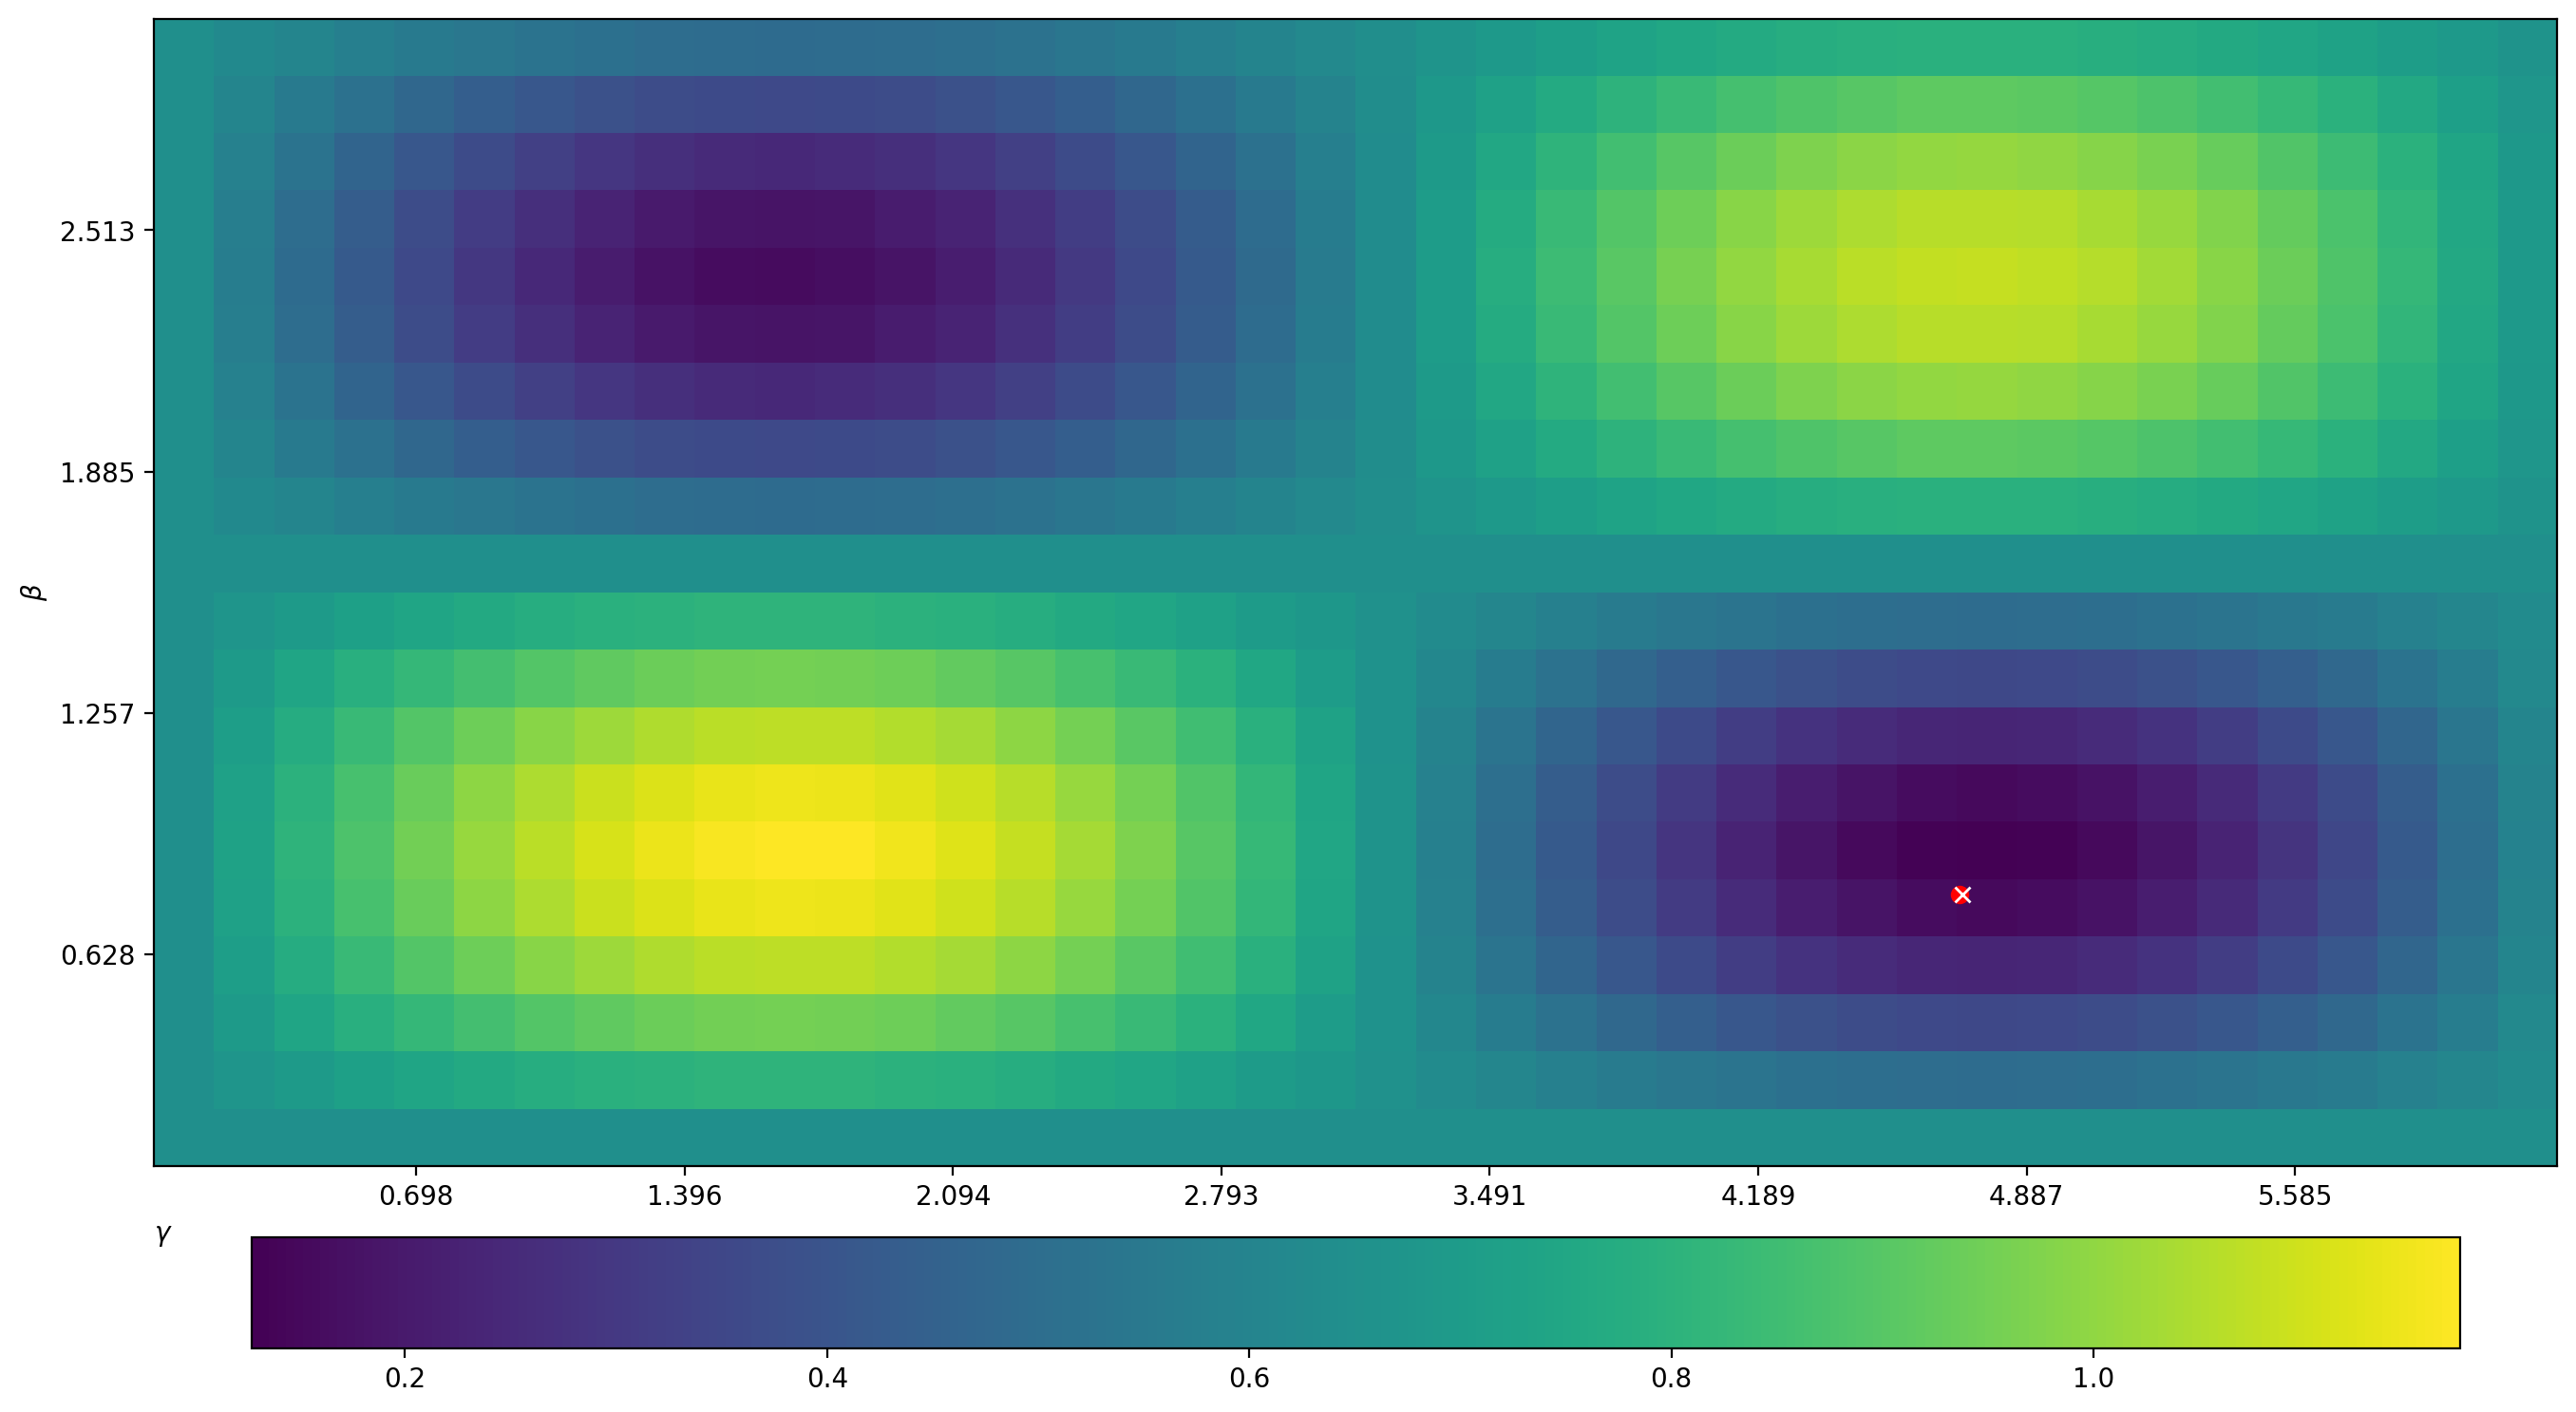

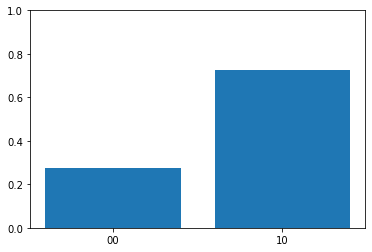

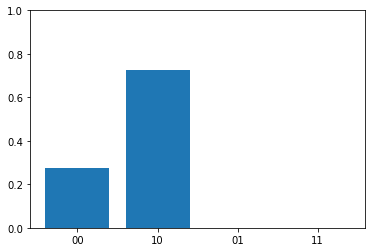

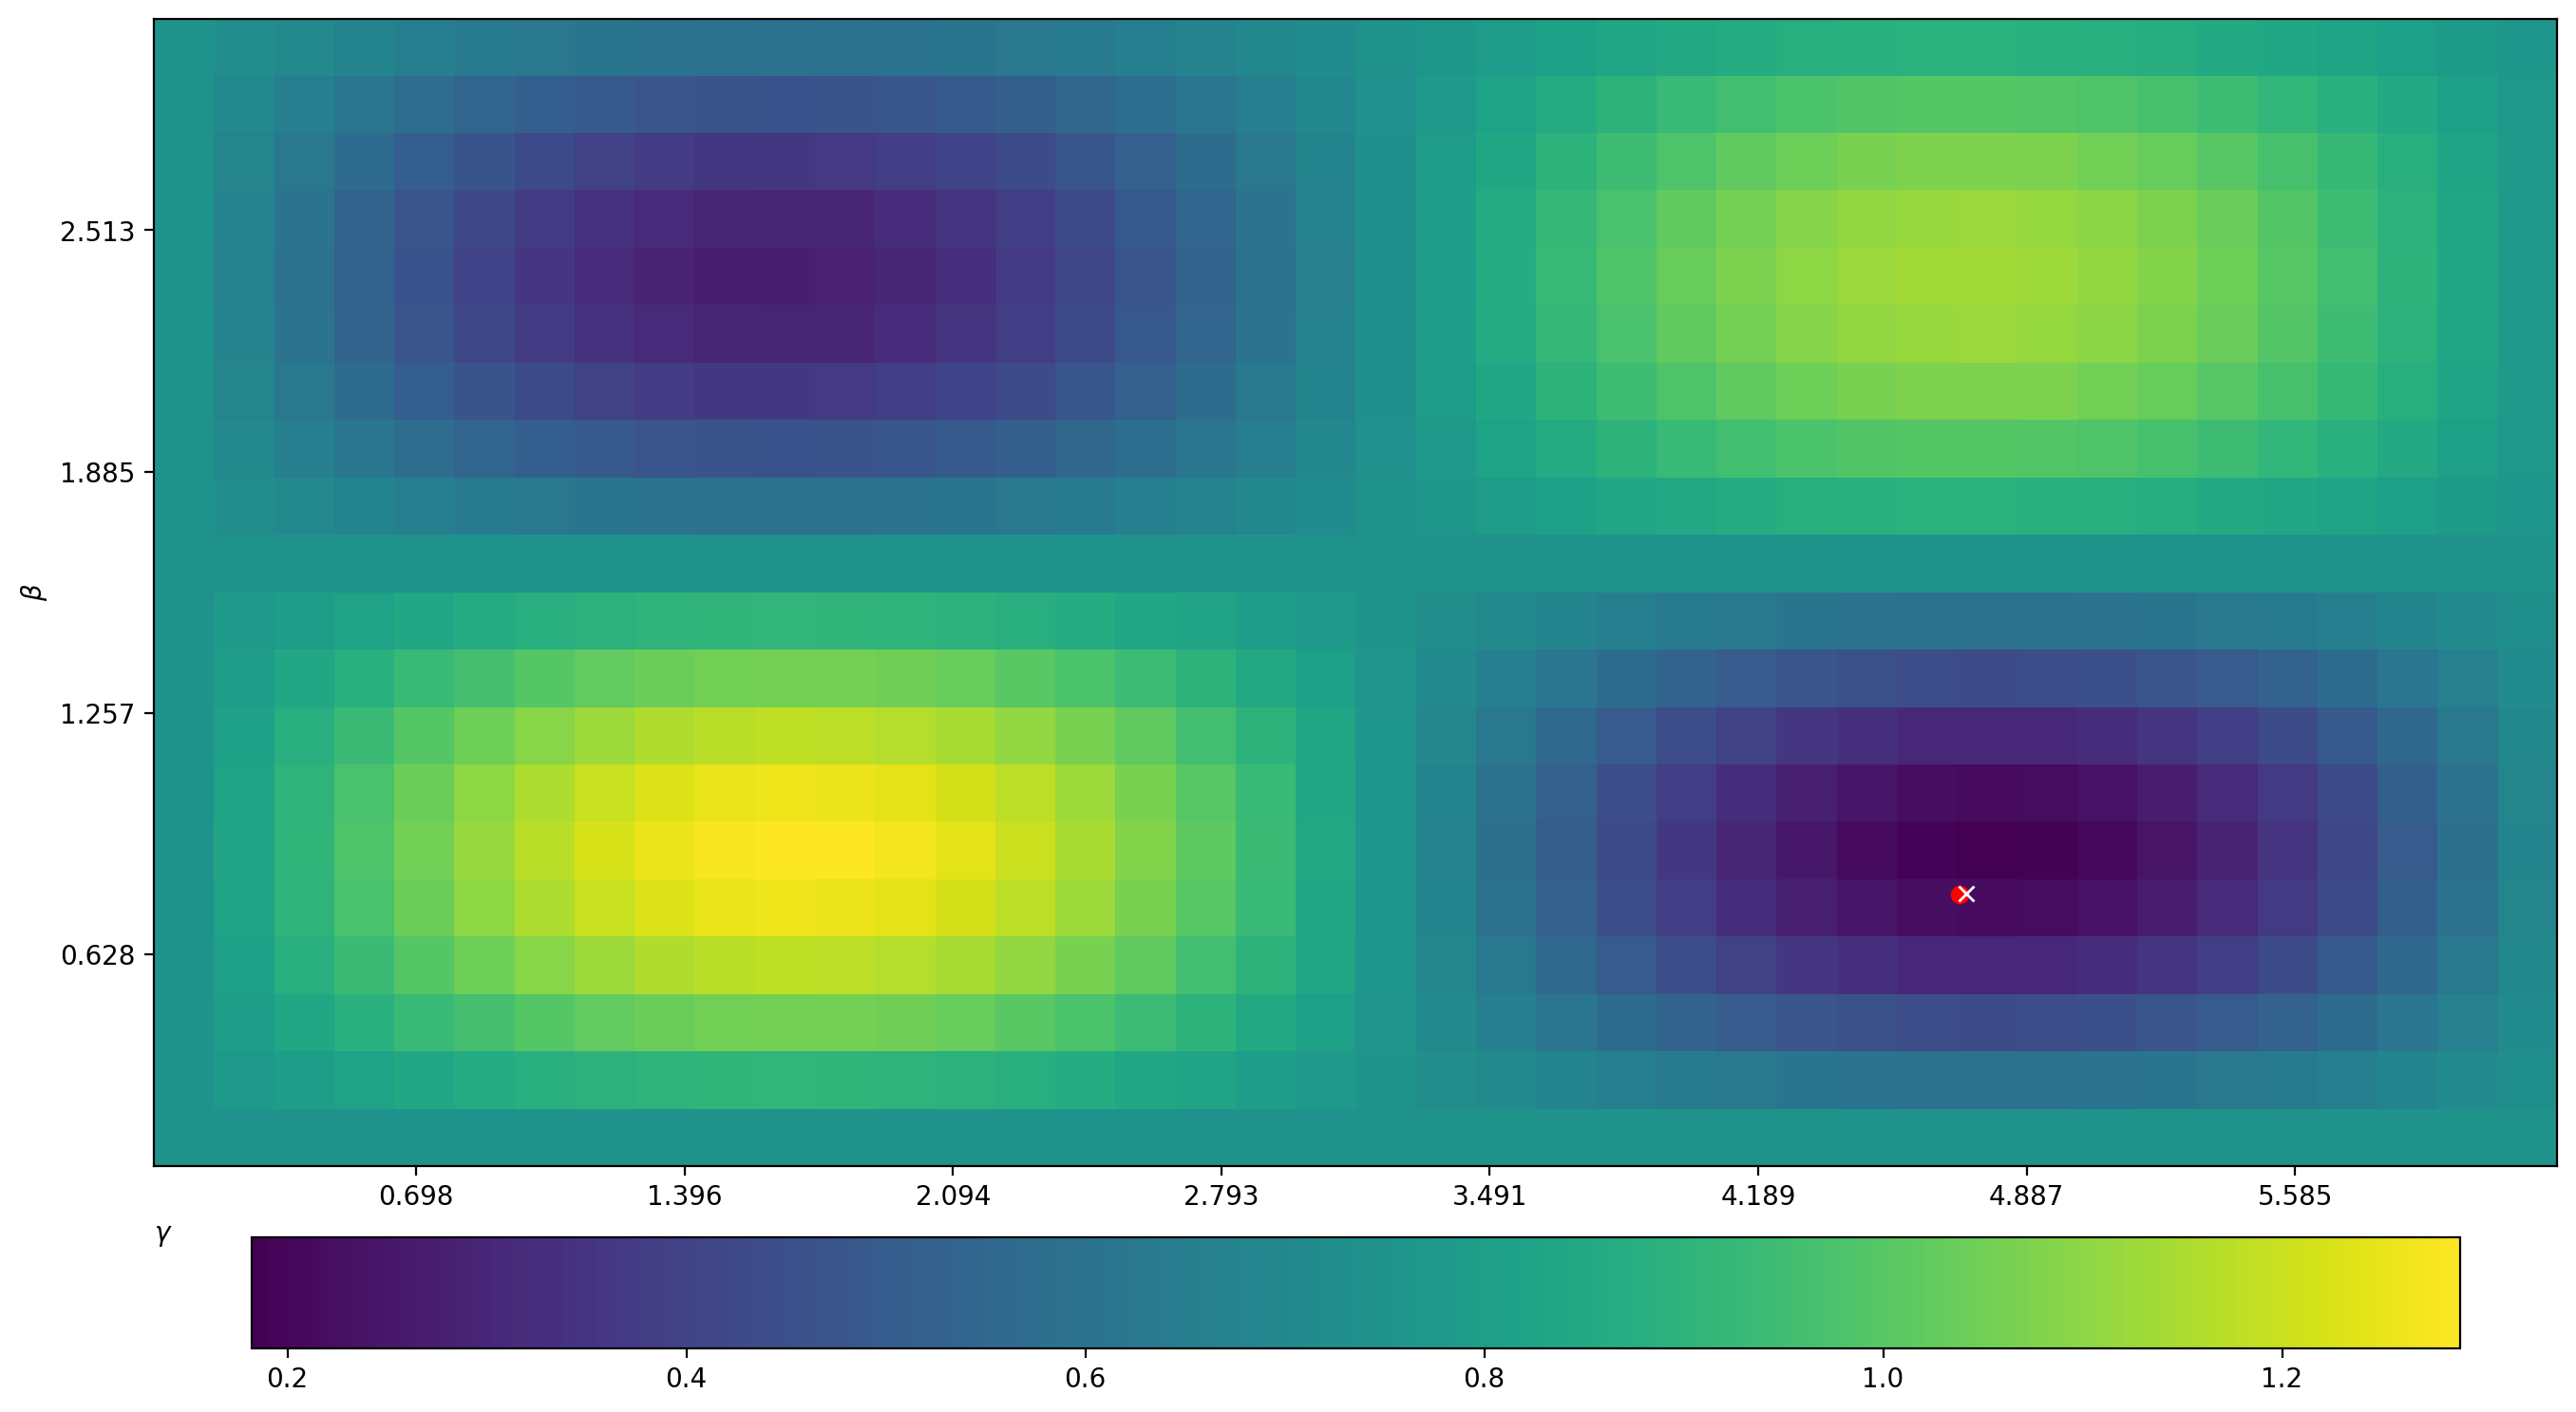

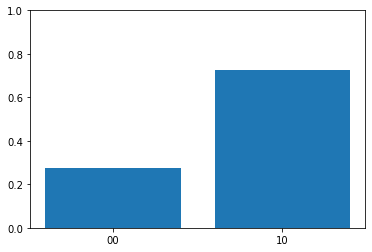

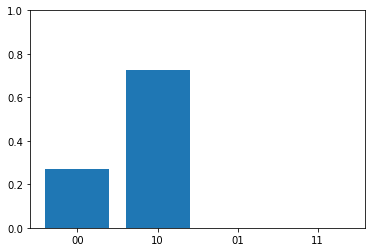

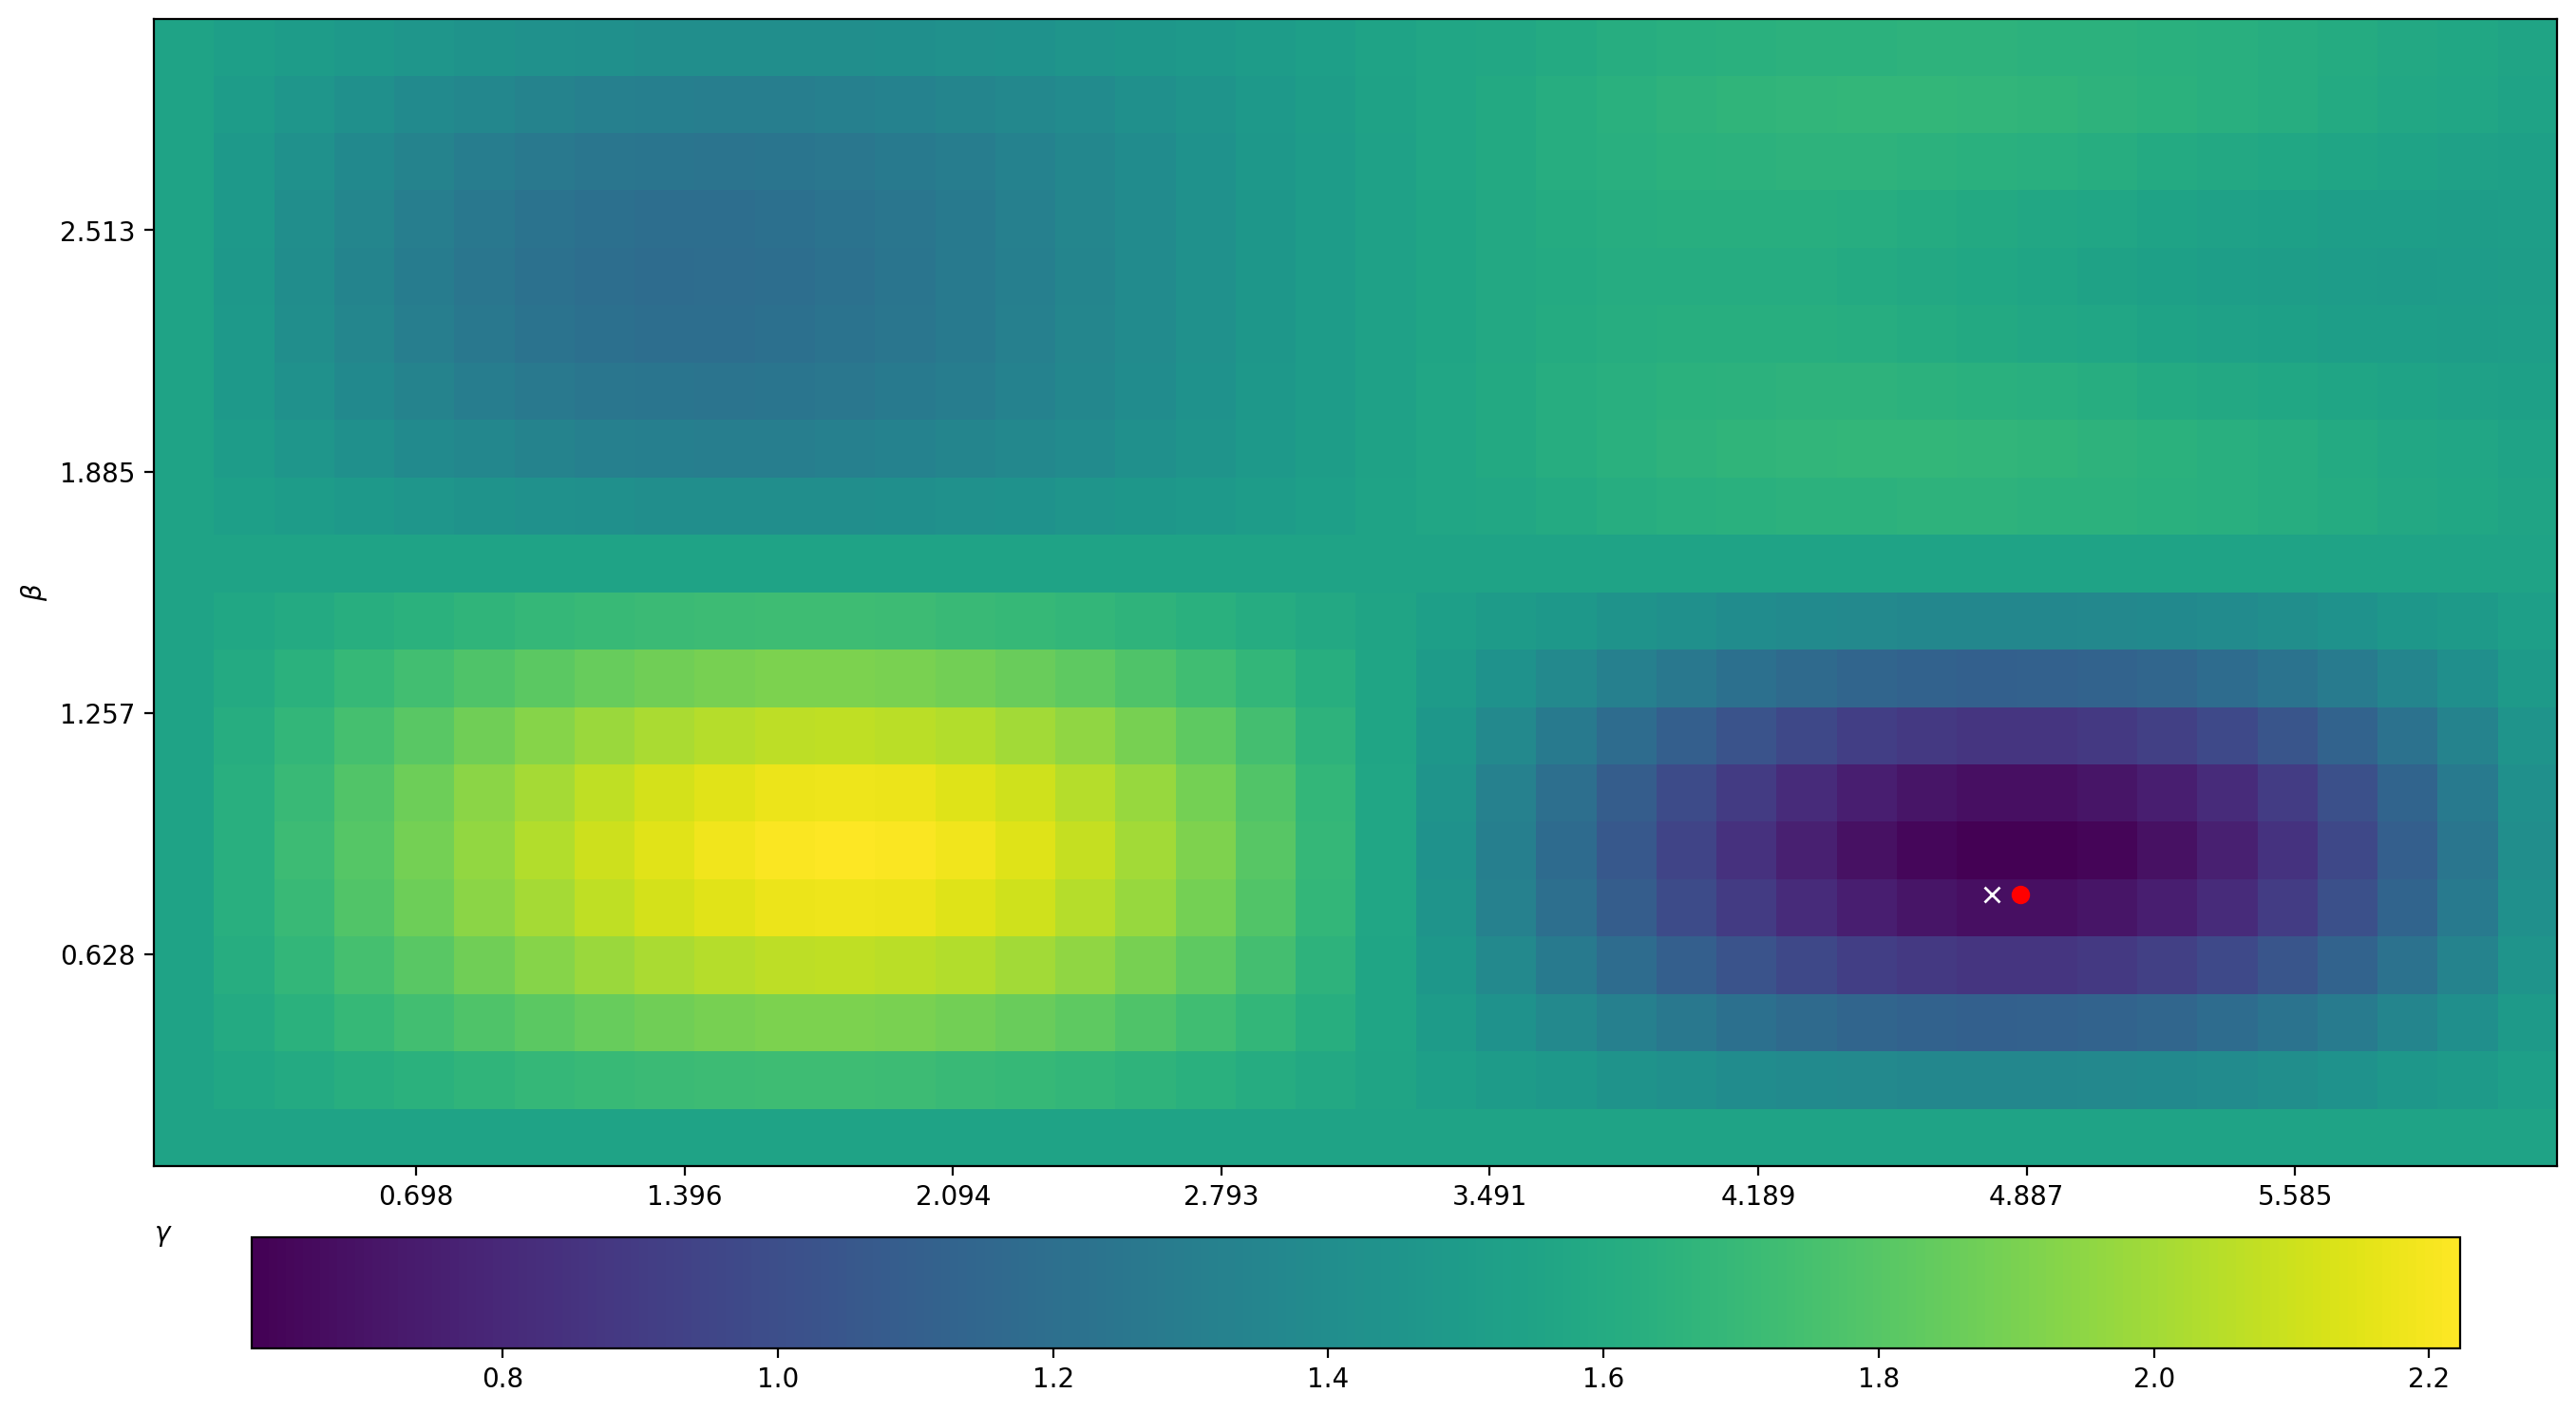

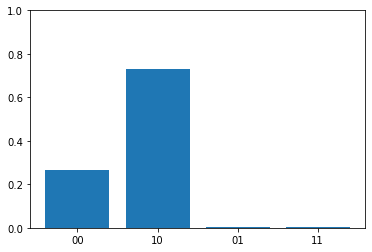

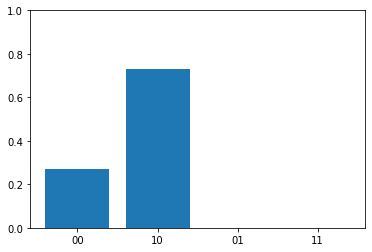

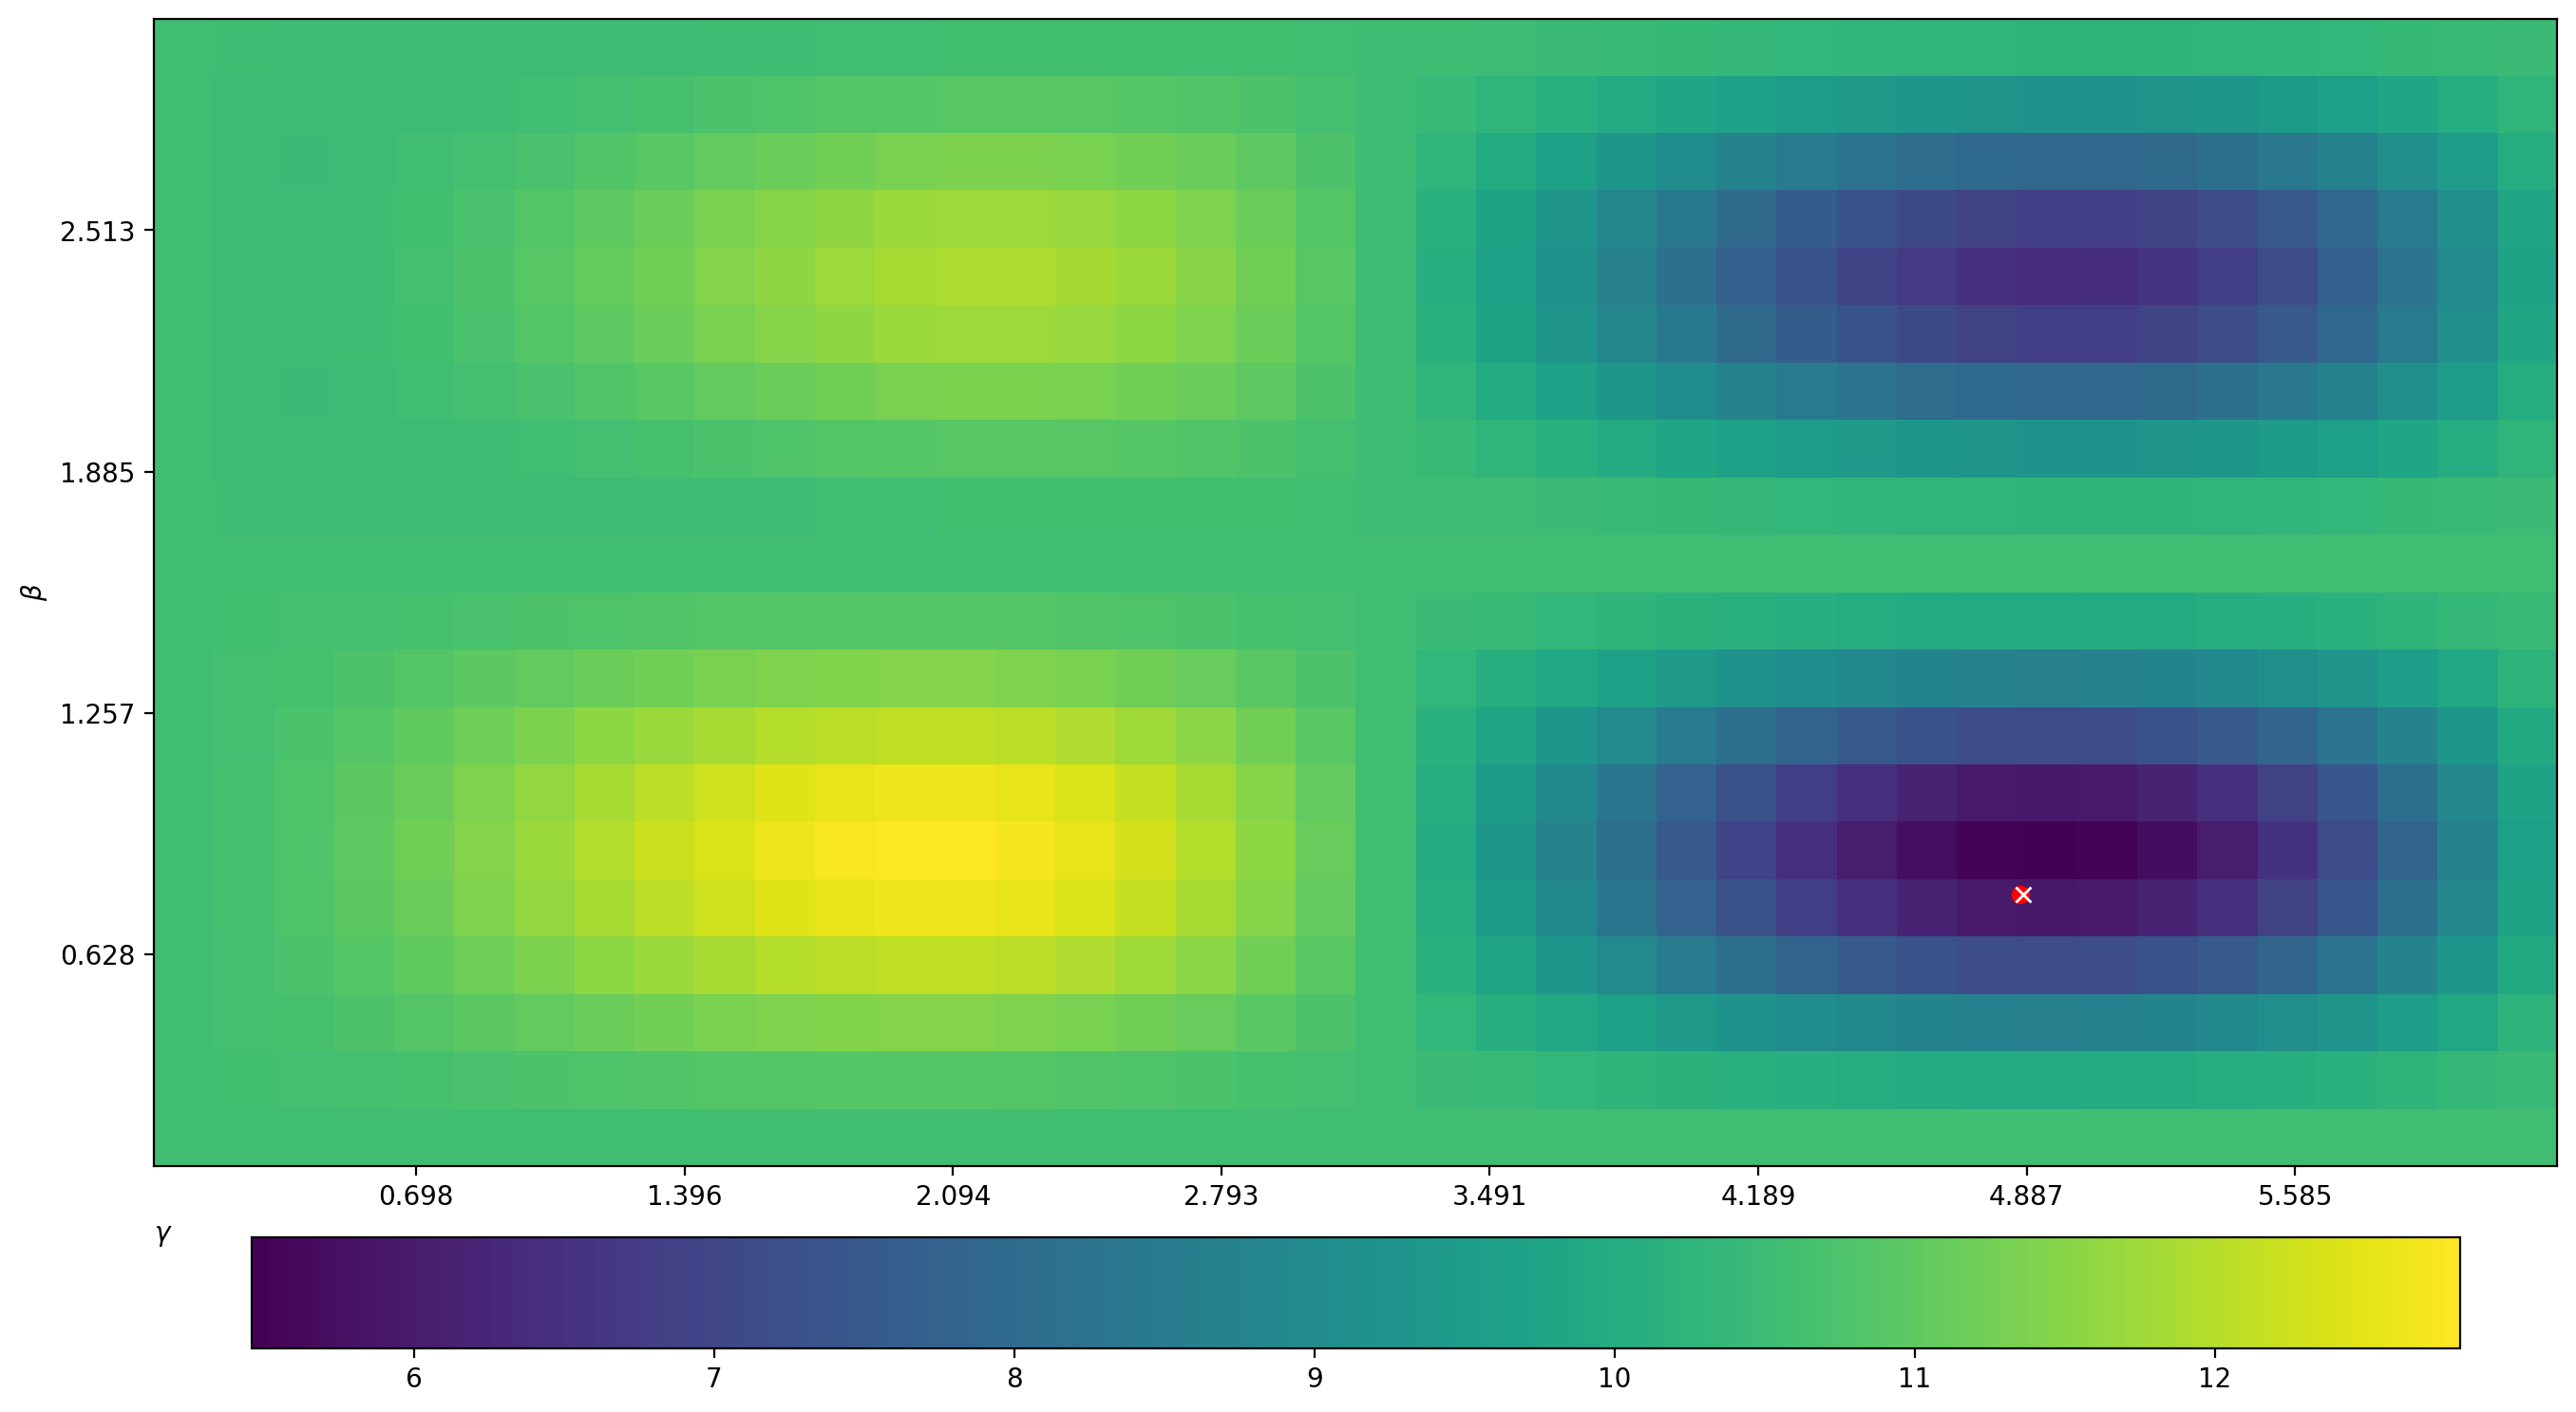

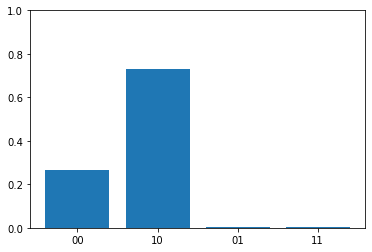

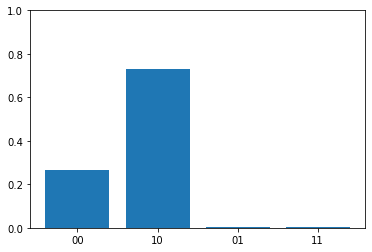

In [33]:
qaoa=QAOAChoose(CR, FR)

for ue in [True, False]:
    for mu in [0.1,0.2,1,10]:
        print("mu=",mu,"useExco=",ue)

        E, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[ue])
        out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[ue])

        # plot landscape
        _=getfig(E,ng=m)
        pl.plot(x0[0],x0[1],'ro')
        pl.plot(xb[0],xb[1],'wx')

        # plot histogram
        md=job.result().get_counts()[int(ji)]
        pl.figure()
        pl.bar([k[::-1] for k in md.keys()], md.values())
        pl.ylim([0,1])

        # plot histogram
        md=job_b.result().get_counts()
        pl.figure()
        pl.bar([k[::-1] for k in md.keys()], md.values())
        pl.ylim([0,1])

mu= 0.1
Optimization terminated successfully.
         Current function value: 0.550010
         Iterations: 19
         Function evaluations: 37
mu= 0.2
Optimization terminated successfully.
         Current function value: 0.550020
         Iterations: 19
         Function evaluations: 37
mu= 1
Optimization terminated successfully.
         Current function value: 0.541002
         Iterations: 58
         Function evaluations: 102
mu= 10
Optimization terminated successfully.
         Current function value: 0.549895
         Iterations: 37
         Function evaluations: 69


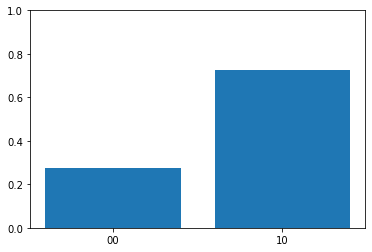

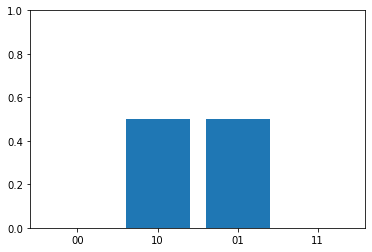

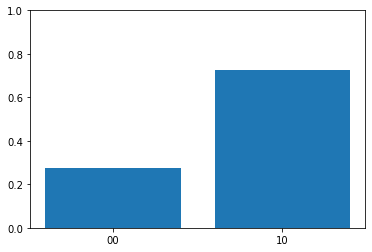

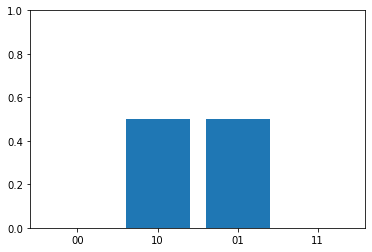

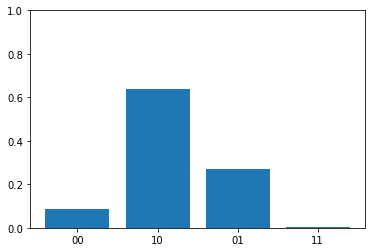

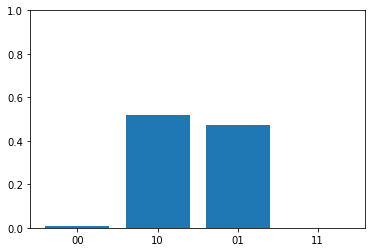

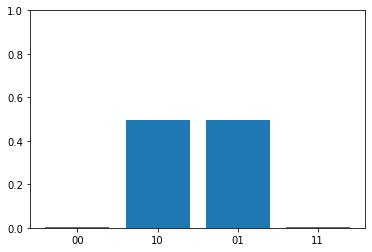

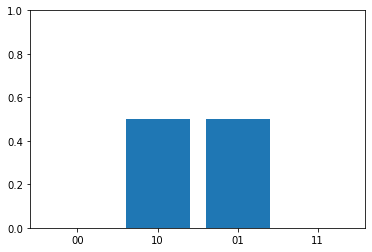

In [34]:
qaoa=QAOANor(CR, FR)

for mu in [0.1,0.2,1,10]:
    print("mu=",mu)
    E, x0, job, ji = qaoa.getElandscape(backend,mu)
    out, job_b, xb = qaoa.getlocalmin(x0, backend, mu)

    # plot histogram
    md=job.result().get_counts()[int(ji)]
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])
    
    # plot histogram
    md=job_b.result().get_counts()
    pl.figure()
    pl.bar([k[::-1] for k in md.keys()], md.values())
    pl.ylim([0,1])

In [14]:
# job.result().get_counts(),
# job.result().results[int(ji)].data.statevector

In [15]:
# qaoa=QAOASwe(CR, FR)

In [16]:
# qc=qaoa.createCircuit(np.array((1.4,2.0)), 1.0,1,barrier=True)
# qc.draw()

In [17]:
# job = execute(qc, backend)
# qaoa.measurementStatistics(job,1,1,mu=1)